#Proyecto Armando Acuña

##Descripción
**Datos sobre el Cancer de Mama**

* Puede ocurrir tanto en hombres como en mujeres, pero es mucho más común en las mujeres.
*   Es el tumor maligno más frecuente en la mujer y aproximadamente 1 de cada 10 mujeres lo paderecá en algún momento de su vida.
* La incidencia de cáncer de mama en España está aumentando y se estima que en 2022 se diagnosticaron 34.750 nuevos casos (144 casos por cada 100.000 mujeres/año).
*El apoyo para la concientización sobre el cáncer de mama y la financiación de la investigación han ayudado a crear avances en el diagnóstico y tratamiento del cáncer de mama.
* Las tasas de supervivencia del cáncer de mama han aumentado y el número de muertes asociadas a esta enfermedad está disminuyendo constantemente, en gran medida debido a factores como la detección más temprana, un nuevo enfoque personalizado del tratamiento y una mejor comprensión de la enfermedad.

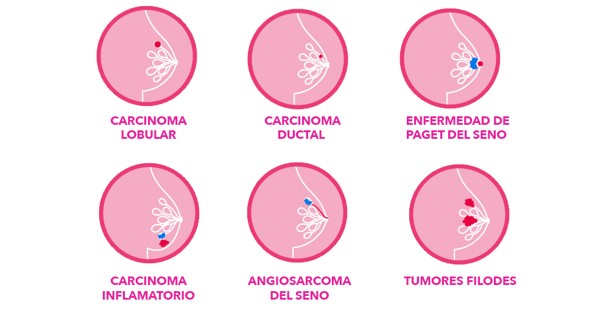

**Descripción del Dataset**

Este conjunto de datos de pacientes con cáncer de mama se obtuvo de la actualización de noviembre de 2017 del Programa SEER del NCI, que proporciona información sobre estadísticas de cáncer basadas en la población. El conjunto de datos involucró a pacientes femeninas con cáncer de mama con carcinoma lobular y ductal infiltrante diagnosticadas entre 2006-2010. Se excluyeron los pacientes con tamaño tumoral desconocido y los pacientes cuyos meses de supervivencia fueron inferiores a 1 mes; dando como resultado 4.024 pacientes.





In [ ]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import seaborn as sns

from sklearn import preprocessing
from xgboost import plot_importance, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

## DATA SOURCE AND ACQUISITION
## Extract Transform Load (ETL)

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/' #Archivo kaggle.json con username, key

In [ ]:
!kaggle datasets download -d reihanenamdari/breast-cancer
!unzip \*.zip && rm *.zip

  0% 0.00/42.8k [00:00<?, ?B/s]
100% 42.8k/42.8k [00:00<00:00, 47.9MB/s]
Archive:  breast-cancer.zip
  inflating: Breast_Cancer.csv       


In [ ]:
data = pd.read_csv('Breast_Cancer.csv')
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
data=data.drop_duplicates()
data.rename({'Reginol Node Positive' : 'Regional Node Positive', 'differentiate' : 'Differentiate', 'T Stage ':'T Stage','Tumor Size':'Tumor Size (mm)'}, axis=1, inplace=True)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


##Primer Modelo de Ejecución

In [ ]:
train=data.copy()
train['Status'] = data['Status'].replace({'Alive': 1, 'Dead': 0})

X_full = train.drop('Status', axis = 1)
X_full = X_full.select_dtypes(include=["number"])
X_full

,Age,Tumor Size (mm),Regional Node Examined,Regional Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50
...,...,...,...,...,...
4019,62,9,1,1,49
4020,56,46,14,8,69
4021,68,22,11,3,69
4022,58,44,11,1,72


In [ ]:
def modelo(train,X_full):
  X = X_full[:len(train)]; new_X = X_full[len(train):]
  y = train.Status
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .3,
                                                    random_state = 5,
                                                    stratify=y)
  # XGBOOST
  model = XGBClassifier()
  model.fit(X_train, y_train)

  # TEST EVALUATION
  y_pred = model.predict(X_test)
  print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

  # SAVE TEST RESULTS
  result = pd.concat([X_test, pd.DataFrame({"predicted":y_pred,"Status":y_test})], axis = 'columns')
  result['error'] = result['predicted']-result['Status']
  result['error_abs'] = abs(result['predicted']-result['Status'])
  result.to_csv("test_result.csv",index=None)

  #Feature Importances
  result = {}
  for i, feature in enumerate(X_full.columns):
    result[feature] = model.feature_importances_[i]
  f_importances = sorted(result.items(), key=lambda x: x[1], reverse=True)

  feat_names =[a_tuple[0] for a_tuple in f_importances]
  score = [a_tuple[1] for a_tuple in f_importances]

  fig, ax = plt.subplots(figsize=(6, 6))
  ax.barh(np.arange(len(f_importances)), score, left=0.001)
  ax.set_yticks(np.arange(len(f_importances)))
  ax.set_yticklabels(feat_names)
  ax.invert_yaxis()  # feat read top-to-bottom
  ax.set_xlabel('Score')
  ax.set_ylabel('Feature')
  ax.set_title('Features Importances')
  plt.show()

  df_feat_importances = pd.DataFrame()
  df_feat_importances['feature'] = feat_names
  df_feat_importances['score'] = score
  print(df_feat_importances)

  #Confusion Matrix
  conf_mat=confusion_matrix(y_test, y_pred)
  fig, ax = plot_confusion_matrix(conf_mat,figsize=(5,5))
  plt.xlabel('Predictions')
  plt.ylabel('Real')
  plt.title('Confusion Matrix')
  plt.show()

  TP = conf_mat[1, 1]
  FP = conf_mat[0, 1]
  FN = conf_mat[1, 0]
  TN = conf_mat[0, 0]

  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  specificity = TN / (TN + FP)

  print(f'Precision: {precision:.4f}')
  print(f'Sensibilidad: {recall:.4f}')
  print(f'Especificidad: {specificity:.4f}')

Accuracy: 89.56%


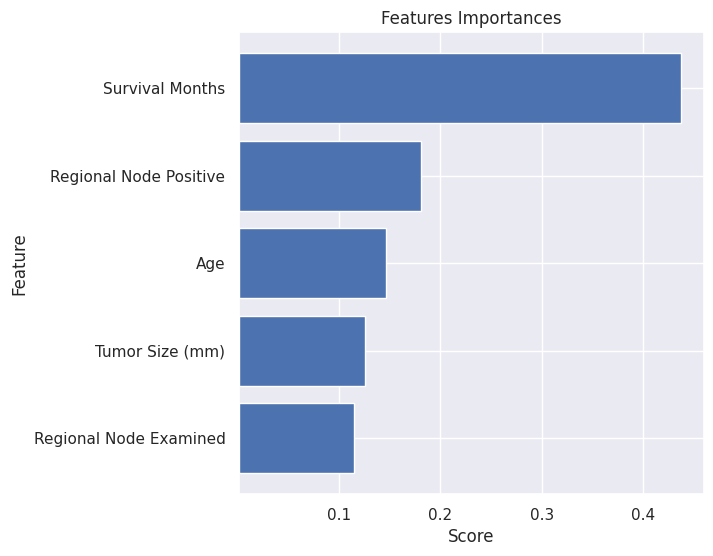

                  feature     score
0         Survival Months  0.436813
1  Regional Node Positive  0.179778
2                     Age  0.145291
3         Tumor Size (mm)  0.124281
4  Regional Node Examined  0.113837


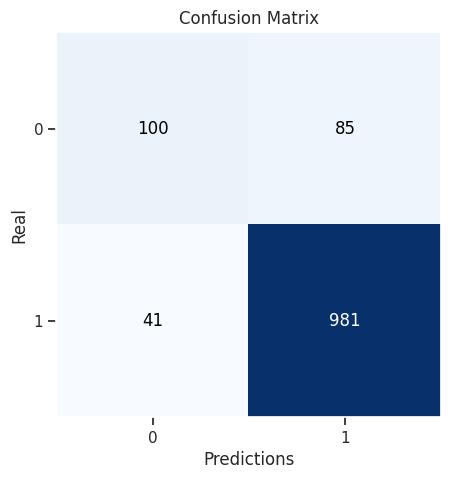

Precision: 0.9203
Sensibilidad: 0.9599
Especificidad: 0.5405


In [ ]:
modelo_1 = modelo(train, X_full)

##Exploratory Data Analysis (EDA)

In [ ]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df=pd.DataFrame(l)
    df.columns=['column','dtypes','nunique','sum_null']
    return df
check(data)

,column,dtypes,nunique,sum_null
0,Age,int64,40,0
1,Race,object,3,0
2,Marital Status,object,5,0
3,T Stage,object,4,0
4,N Stage,object,3,0
5,6th Stage,object,5,0
6,Differentiate,object,4,0
7,Grade,object,4,0
8,A Stage,object,2,0
9,Tumor Size (mm),int64,110,0


In [ ]:
C_col = []
N_col = []
for col in data.columns:
    if data[col].dtype == 'object':
        C_col.append(col)
    elif data[col].dtype == 'int64':
        N_col.append(col)
print(f"# Columnas Numéricas = {len(N_col)}", N_col)
print(f"# Columnas Categóricas = {len(C_col)}", C_col)

# Columnas Numéricas = 5 ['Age', 'Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']
# Columnas Categóricas = 11 ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


### Columnas Numéricas

In [ ]:
print("Análisis de Columnas Numéricas")
data.describe()

Análisis de Columnas Numéricas


,Age,Tumor Size (mm),Regional Node Examined,Regional Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


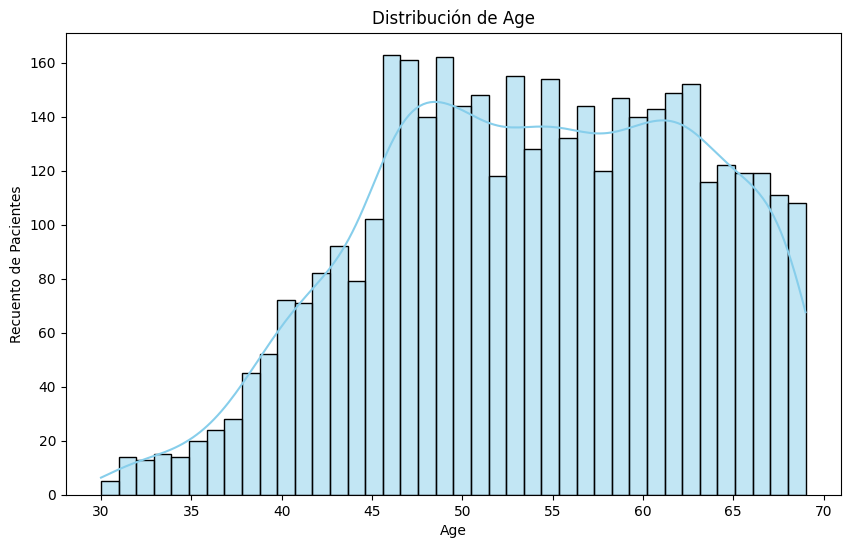

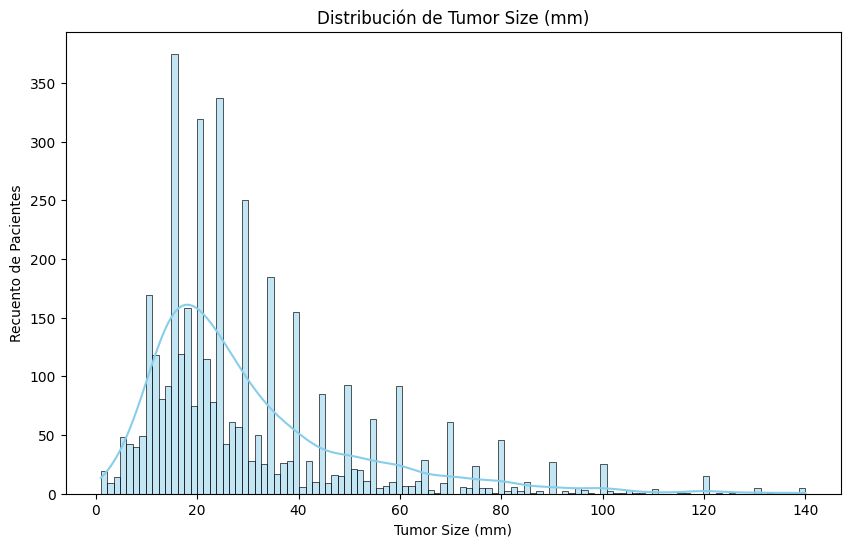

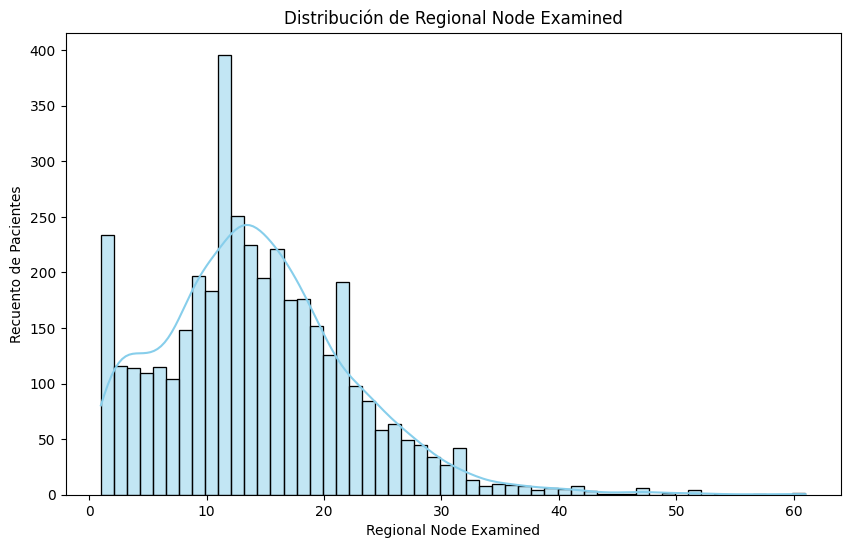

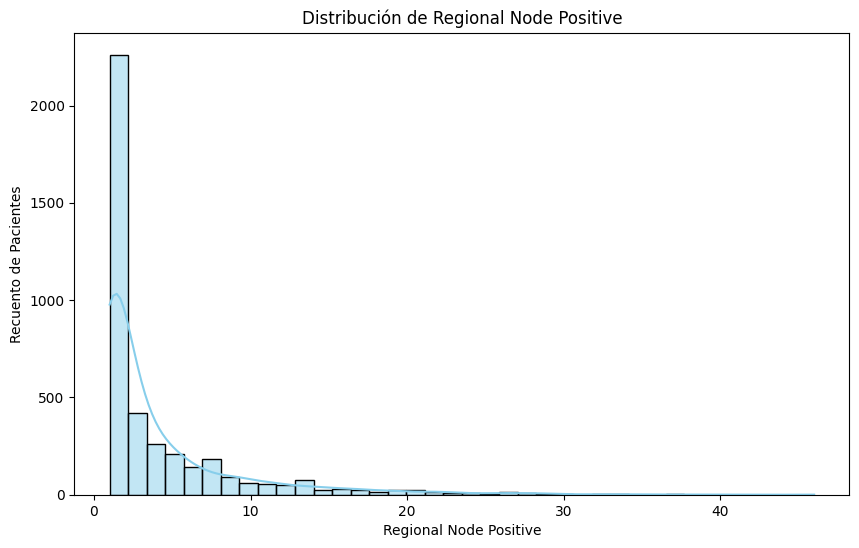

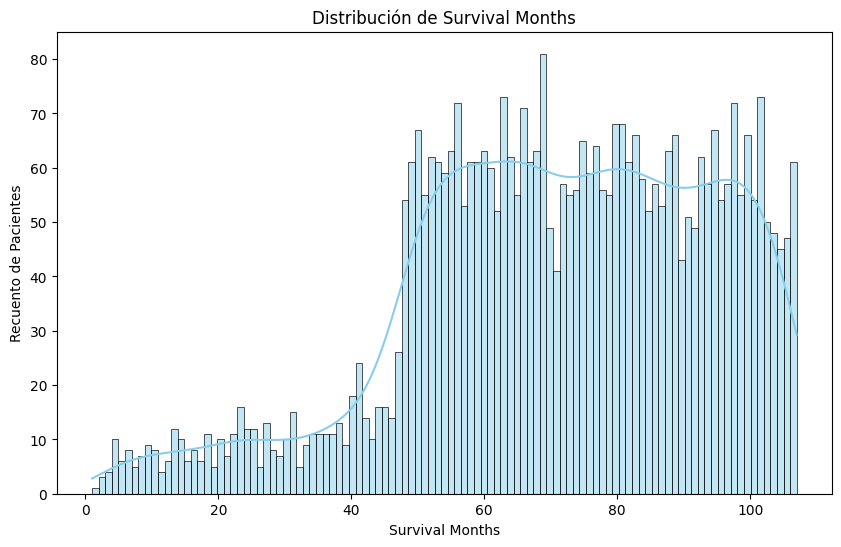

In [ ]:
for col in N_col:
    num_bins=data[col].nunique()
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='skyblue', bins=num_bins)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Recuento de Pacientes')
    plt.show()

1. Age
  * Edades entre 30 y 69 años
  * Media de 53.97 años
2. Tumor Size (mm)
  * Tumores desde 1mm a 140mm
  * Media de 30.48mm
3. Regional Node Examined
  * Valor mínimo 1
  * Valor máximo 61
  * Media de 14.36
4. Regional Node Positive
  * Valor mínimo 1
  * Valor máximo 46
  * Media de 4.16
5. Survival Months
  * Meses entre 1 y 107 meses
  * Media de 71.3

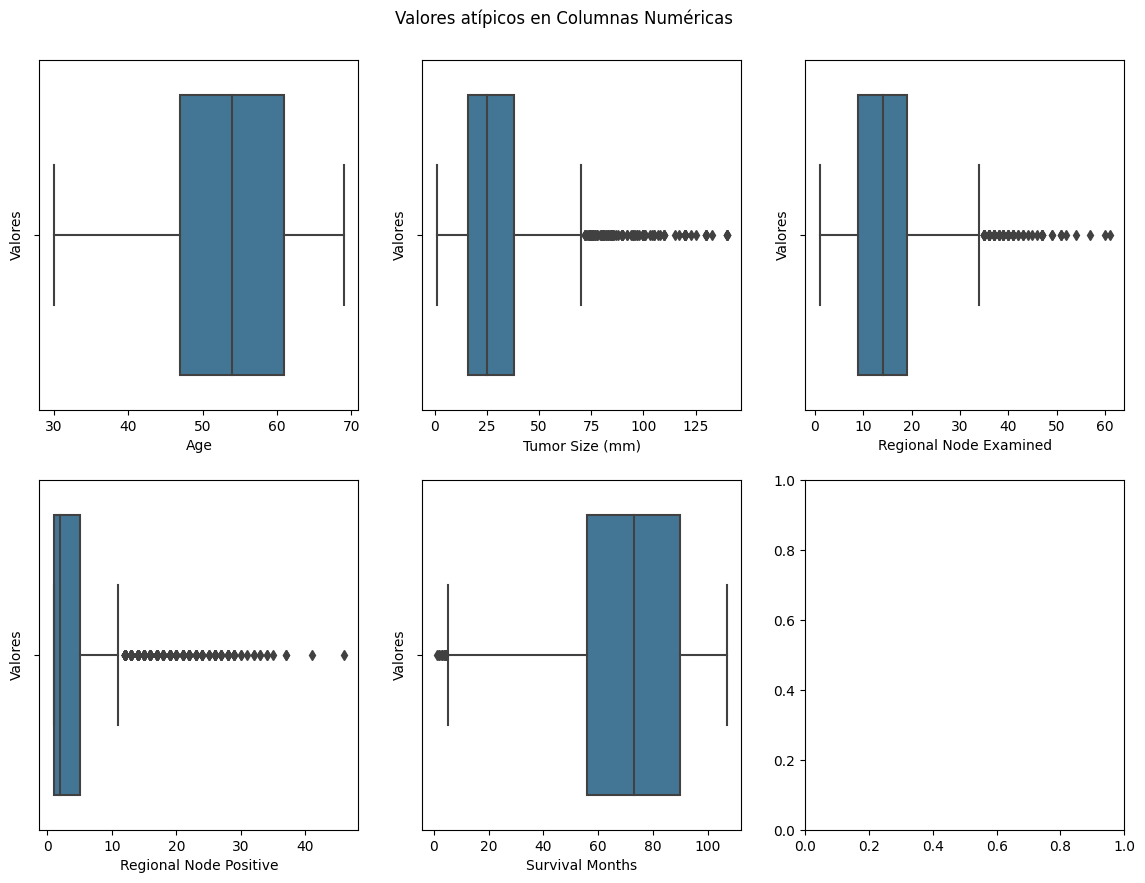

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10), dpi=100)
fig.suptitle('Valores atípicos en Columnas Numéricas', y = 0.93);
for col, ax in zip(N_col, axes.ravel()):
    sns.boxplot(data=data, x=col, palette='mako_r', ax=ax)
    ax.set_ylabel('Valores')

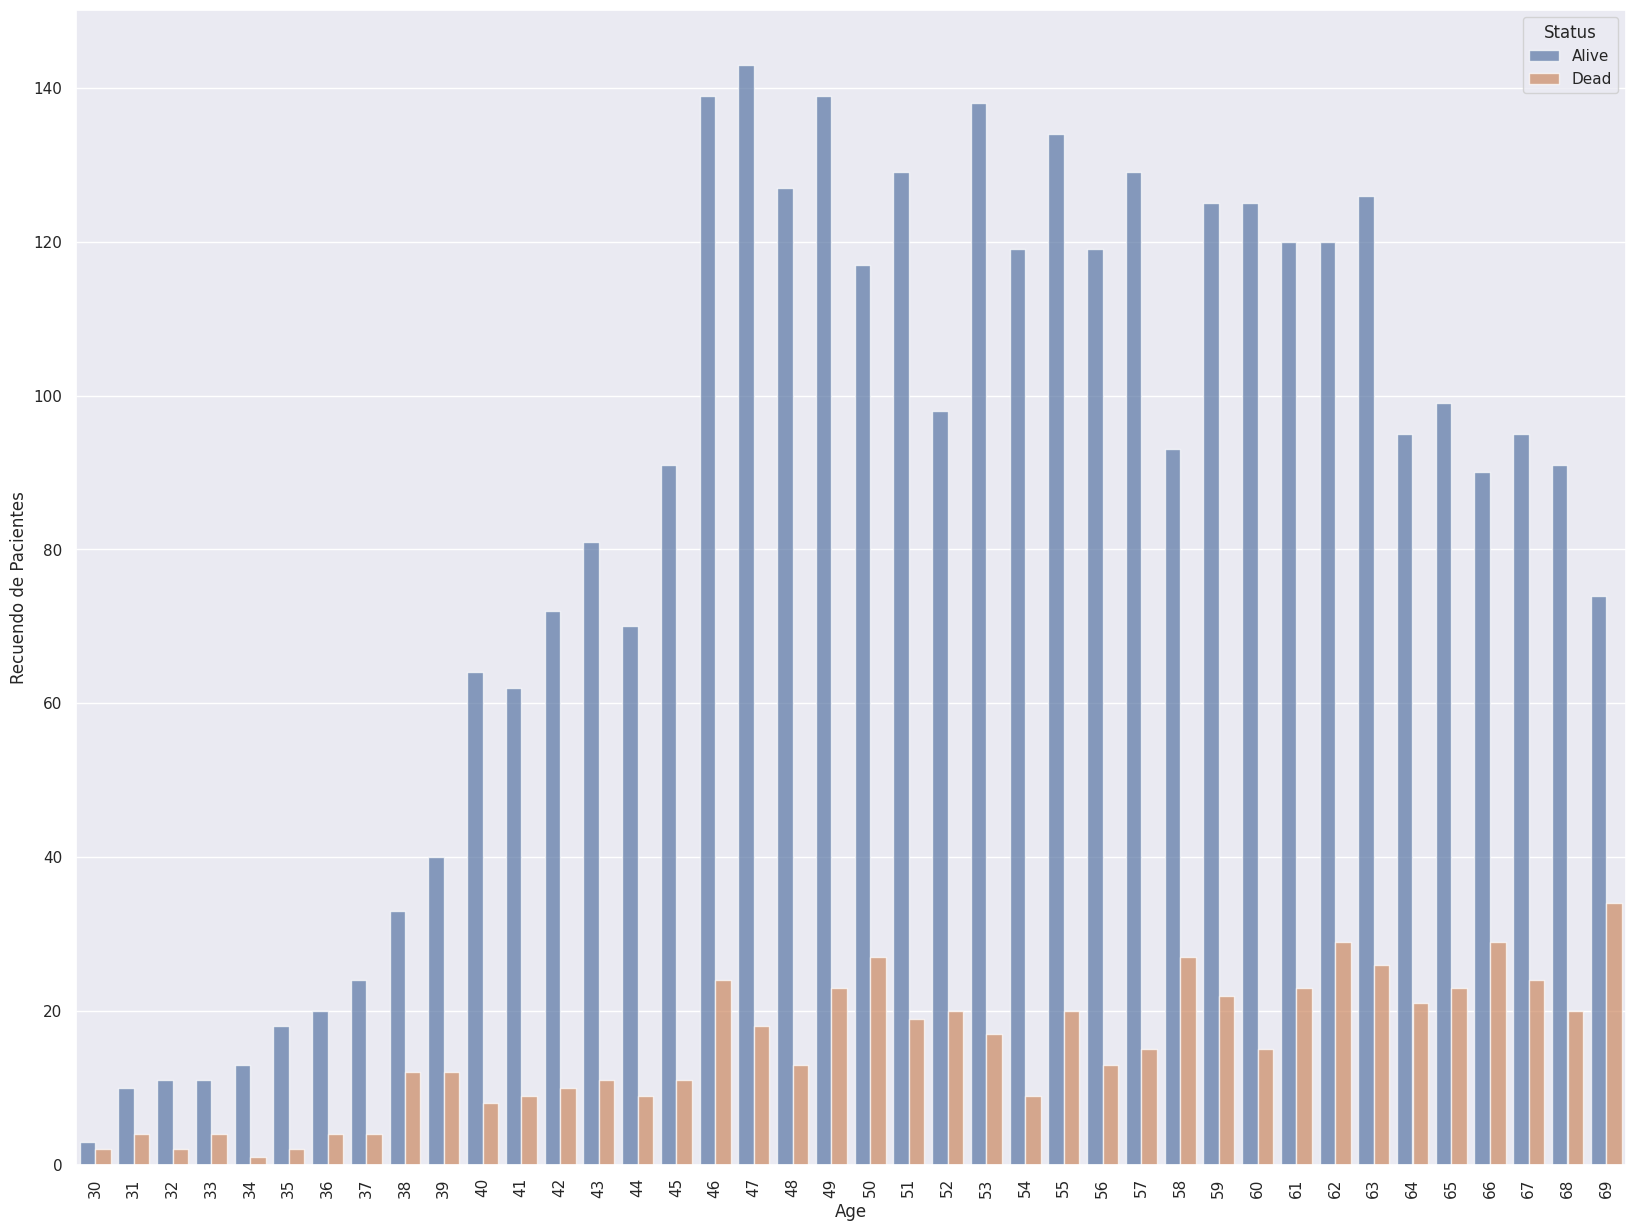

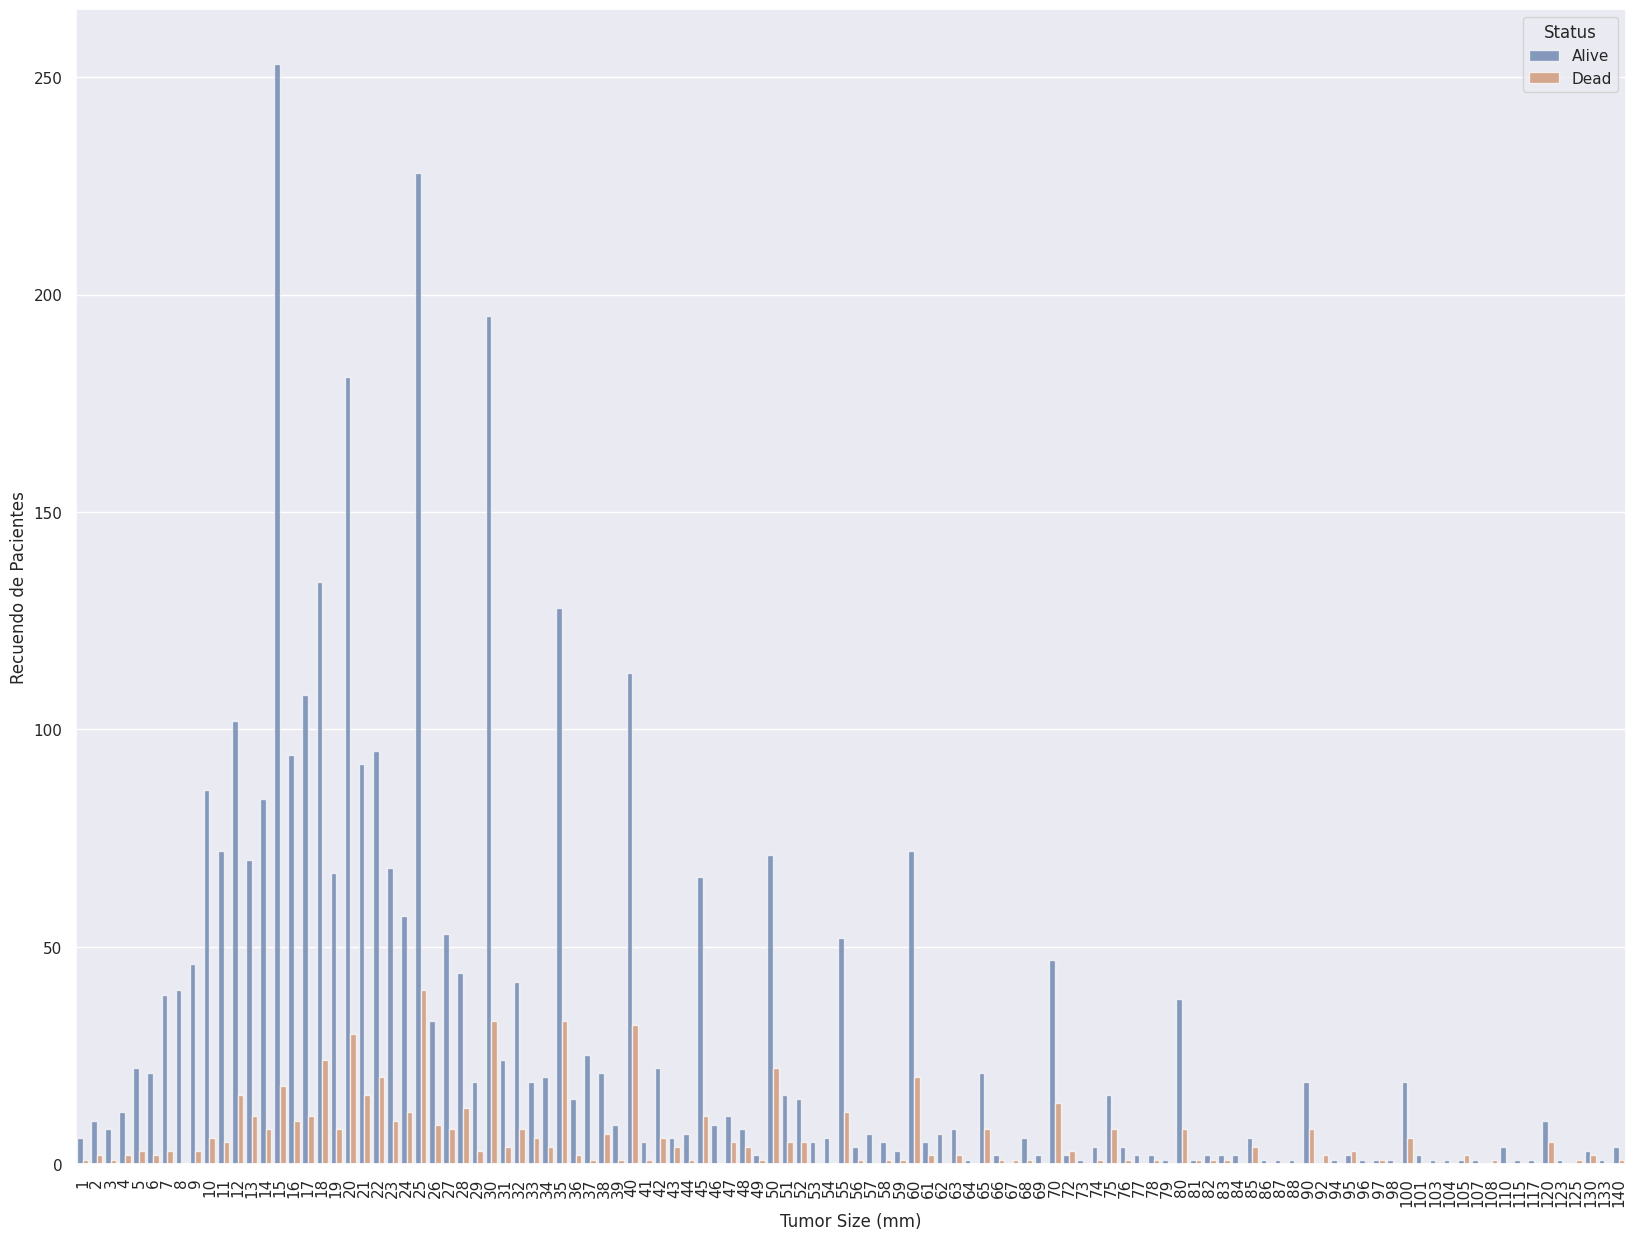

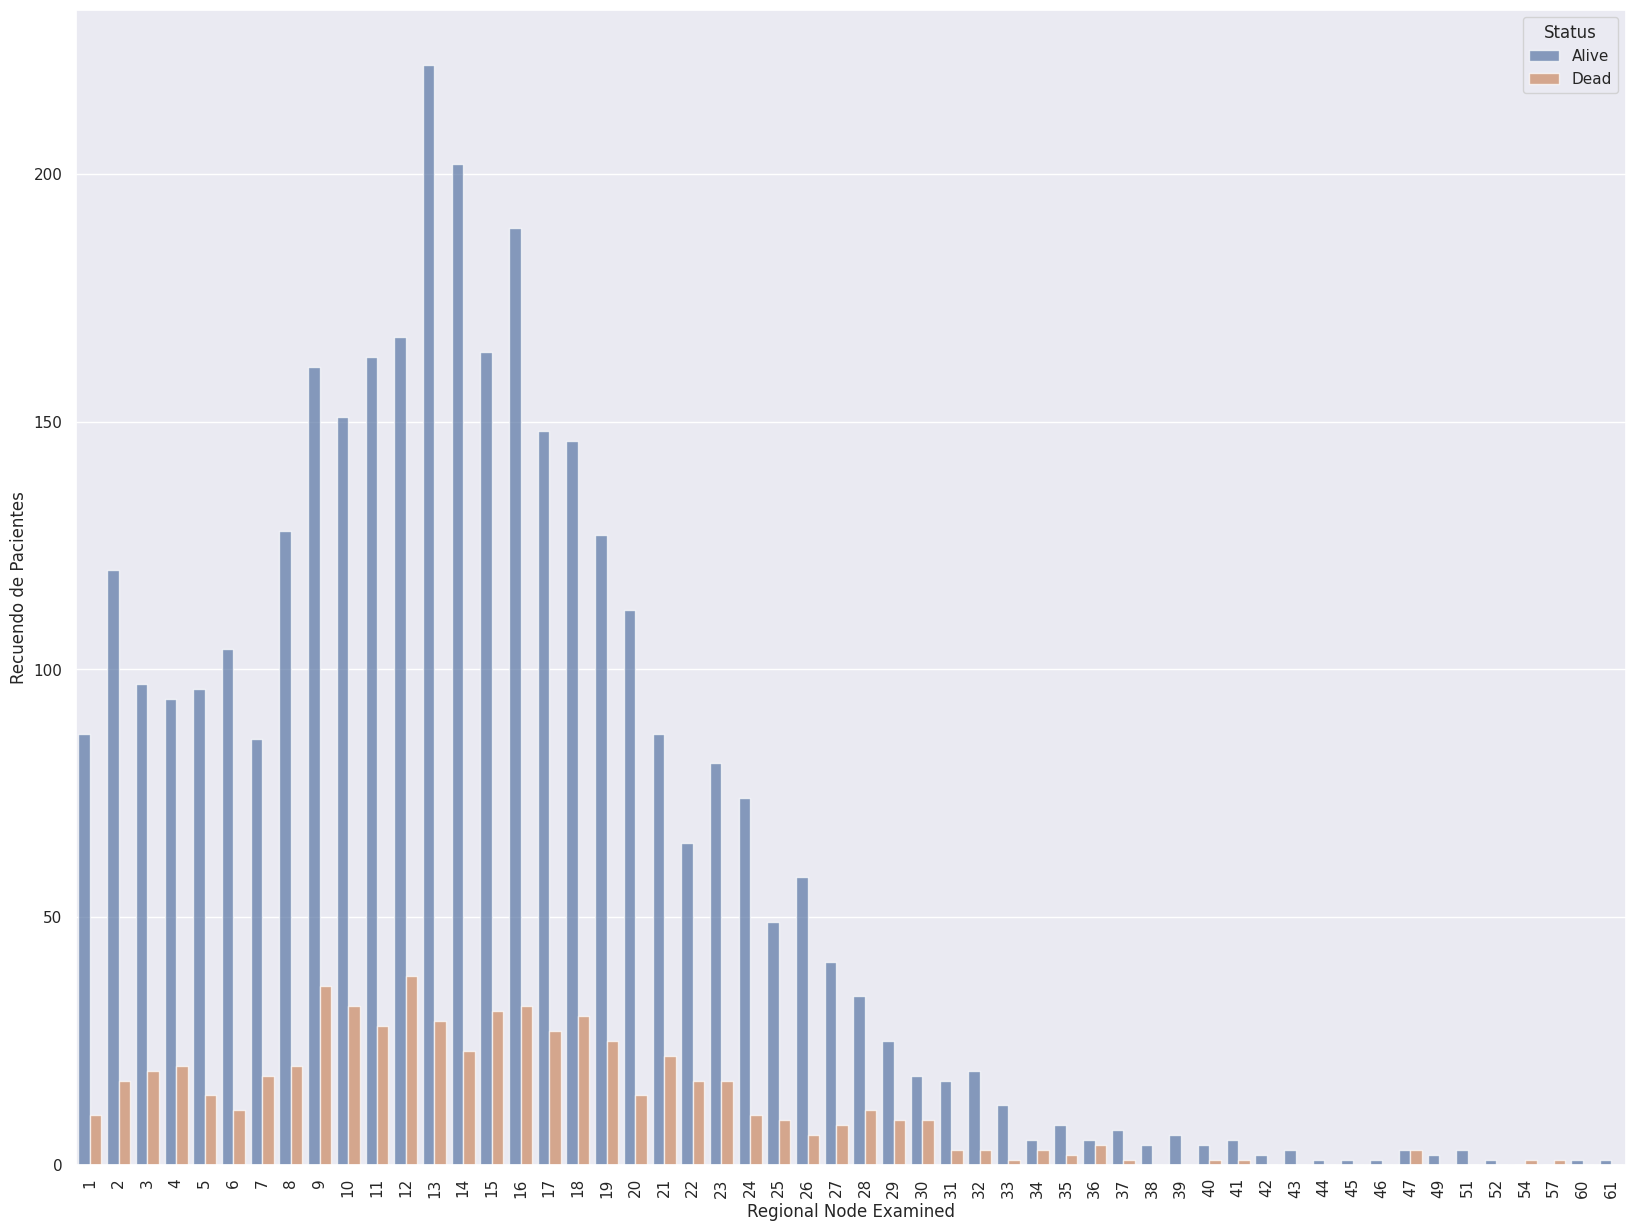

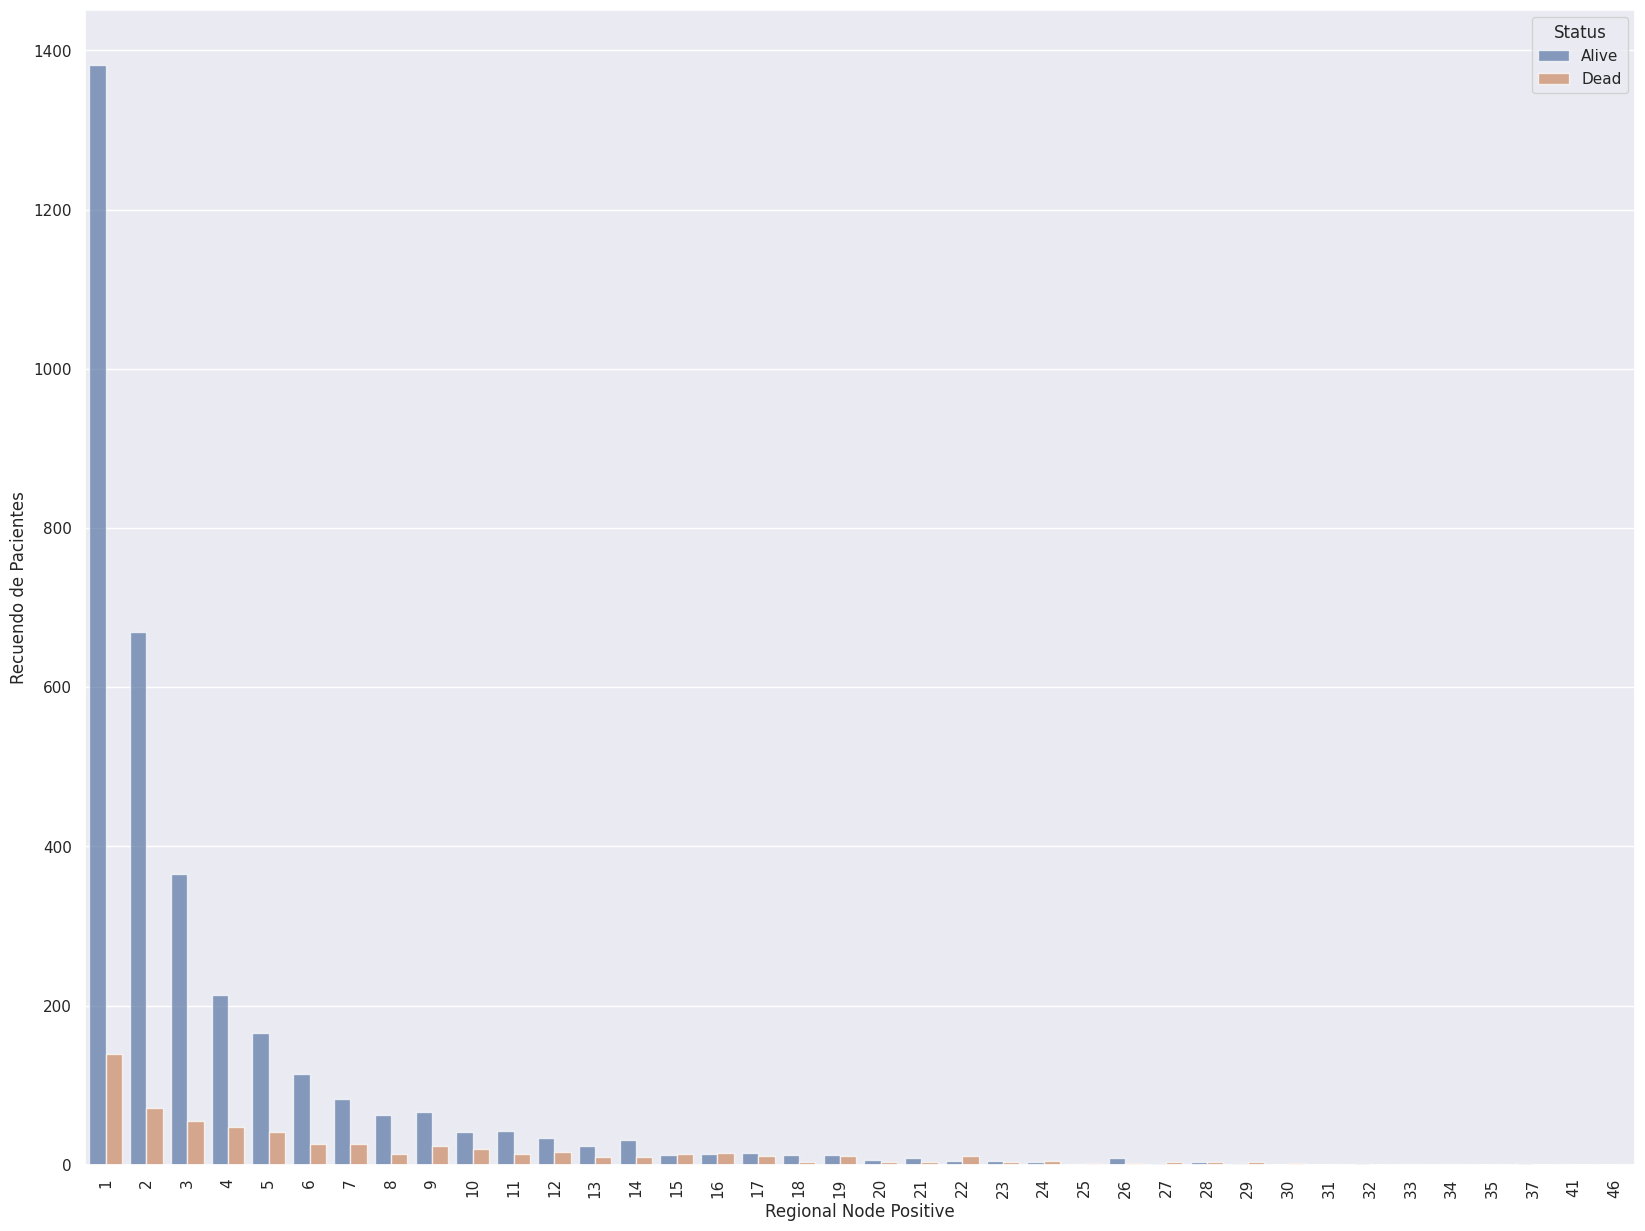

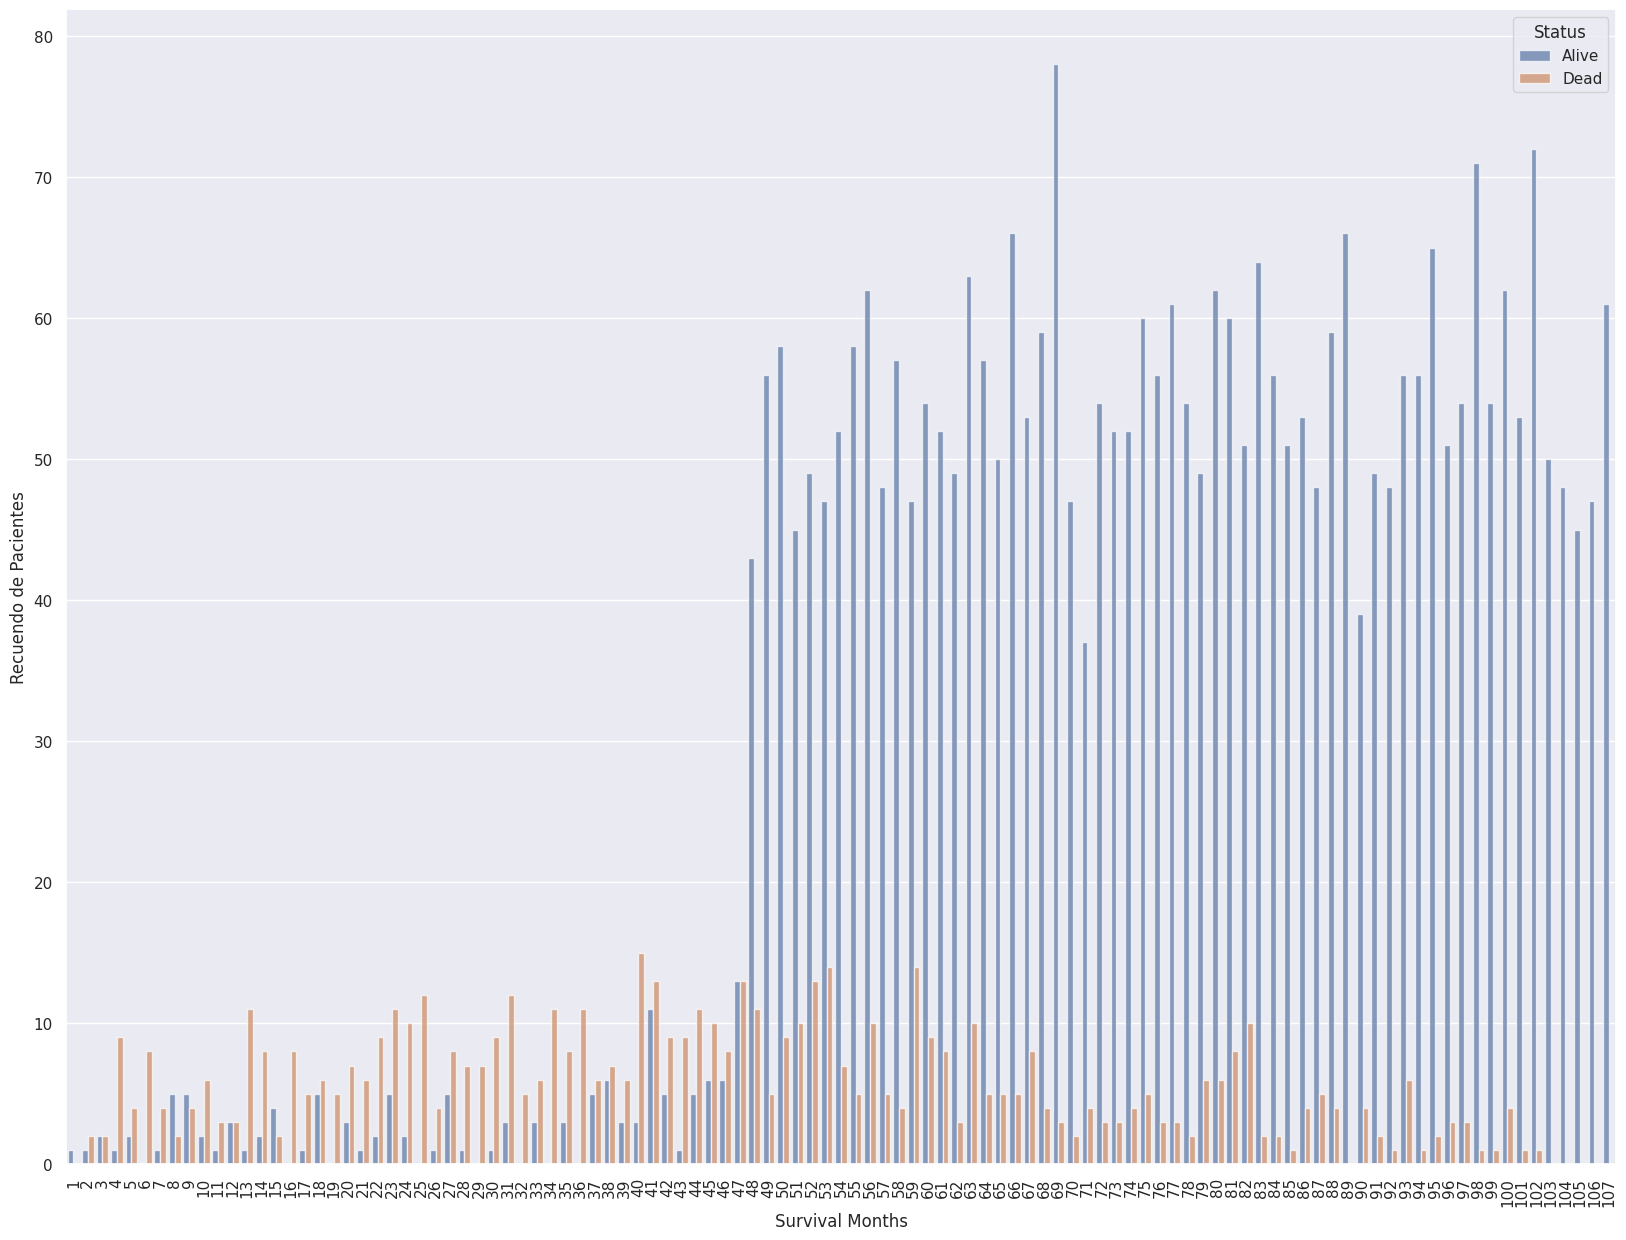

In [ ]:
def countplot (df,var):
    if var != 'Status':
      sns.set(rc={'figure.figsize': (20, 15)})
      sns.countplot(data=df,x=var,hue='Status',alpha=0.7)
      plt.xticks(rotation=90)
      plt.ylabel('Recuendo de Pacientes')
      plt.show()

for i in N_col:
    countplot(data,i)

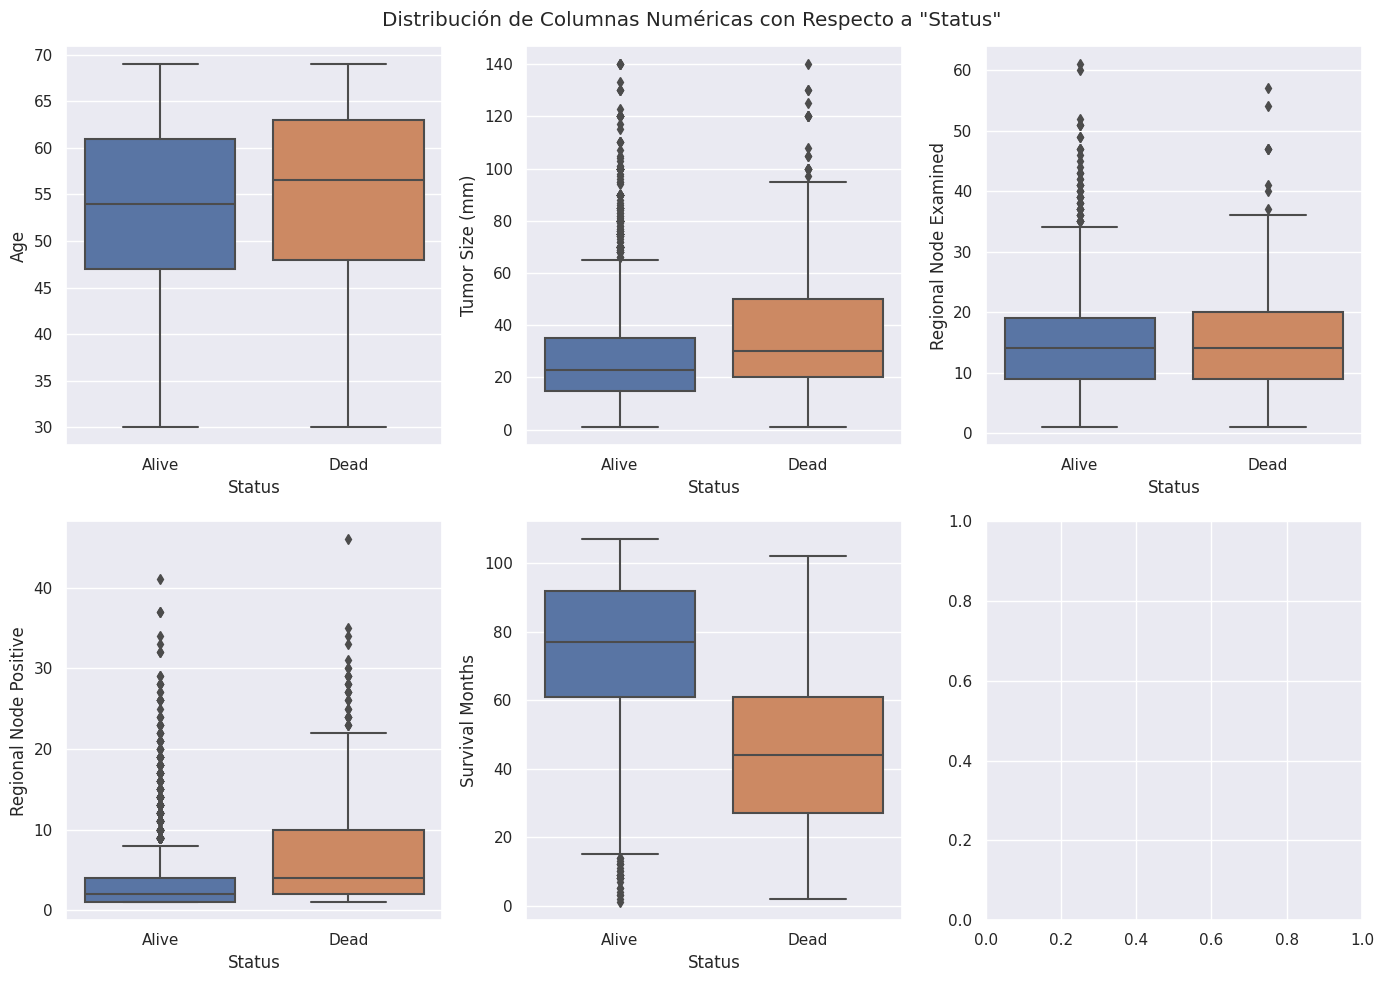

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10), dpi=100)
fig.suptitle('Distribución de Columnas Numéricas con Respecto a "Status"');
for col, ax in zip(N_col, axes.ravel()):
    sns.boxplot(data=data, x='Status', y=col, ax=ax)
plt.tight_layout()

<ipython-input-19-b05b88581bf2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


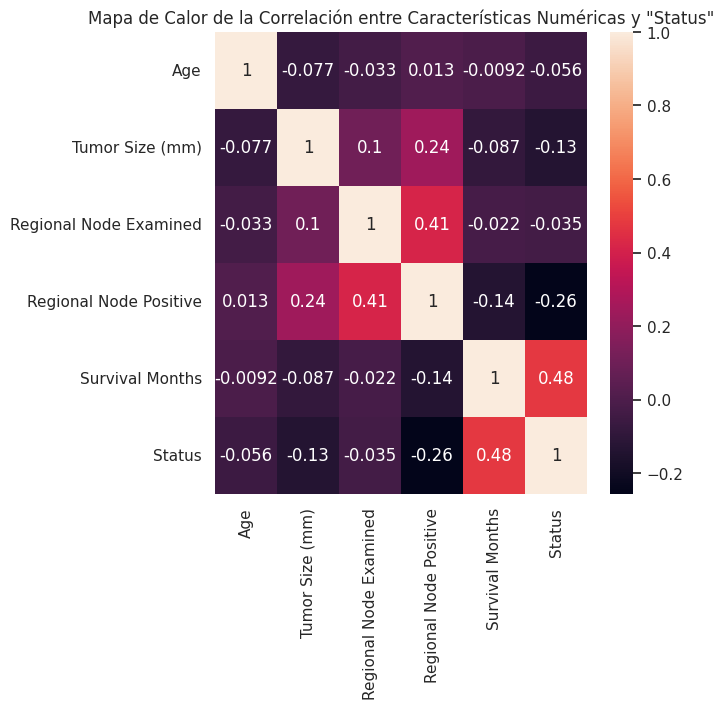

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
sns.heatmap(train.corr(), annot=True)
plt.title('Mapa de Calor de la Correlación entre Características Numéricas y "Status"');

### Columnas Categóricas

In [ ]:
print("Análisis de Columnas Categóricas")
result_dfs = []
for col in C_col:
    col_counts = data[col].value_counts()
    total_rows = len(data)
    col_percentages = (col_counts / total_rows) * 100

    result_df = pd.DataFrame({
        "Valores Únicos": col_counts.index,
        "Recuento": col_counts.values,
        "Porcentaje por Categoría": col_percentages.values
    })
    result_dfs.append(result_df)
for col, result_df in zip(C_col, result_dfs):
    print(f"\nAnálisis para la columna '{col}':")
    display(result_df)
    print("-" * 50)

Análisis de Columnas Categóricas

Análisis para la columna 'Race':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,White,3412,84.812329
1,Other,320,7.954263
2,Black,291,7.233408


--------------------------------------------------

Análisis para la columna 'Marital Status':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,Married,2642,65.672384
1,Single,615,15.287099
2,Divorced,486,12.080537
3,Widowed,235,5.841412
4,Separated,45,1.118568


--------------------------------------------------

Análisis para la columna 'T Stage':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,T2,1786,44.394730
1,T1,1602,39.821029
2,T3,533,13.248819
3,T4,102,2.535421


--------------------------------------------------

Análisis para la columna 'N Stage':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,N1,2731,67.884663
1,N2,820,20.382799
2,N3,472,11.732538


--------------------------------------------------

Análisis para la columna '6th Stage':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,IIA,1304,32.413622
1,IIB,1130,28.088491
2,IIIA,1050,26.099925
3,IIIC,472,11.732538
4,IIIB,67,1.665424


--------------------------------------------------

Análisis para la columna 'Differentiate':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,Moderately differentiated,2350,58.414119
1,Poorly differentiated,1111,27.616207
2,Well differentiated,543,13.497390
3,Undifferentiated,19,0.472284


--------------------------------------------------

Análisis para la columna 'Grade':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,2,2350,58.414119
1,3,1111,27.616207
2,1,543,13.497390
3,anaplastic; Grade IV,19,0.472284


--------------------------------------------------

Análisis para la columna 'A Stage':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,Regional,3931,97.713149
1,Distant,92,2.286851


--------------------------------------------------

Análisis para la columna 'Estrogen Status':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,Positive,3754,93.313448
1,Negative,269,6.686552


--------------------------------------------------

Análisis para la columna 'Progesterone Status':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,Positive,3325,82.649764
1,Negative,698,17.350236


--------------------------------------------------

Análisis para la columna 'Status':


,Valores Únicos,Recuento,Porcentaje por Categoría
0,Alive,3407,84.688044
1,Dead,616,15.311956


--------------------------------------------------


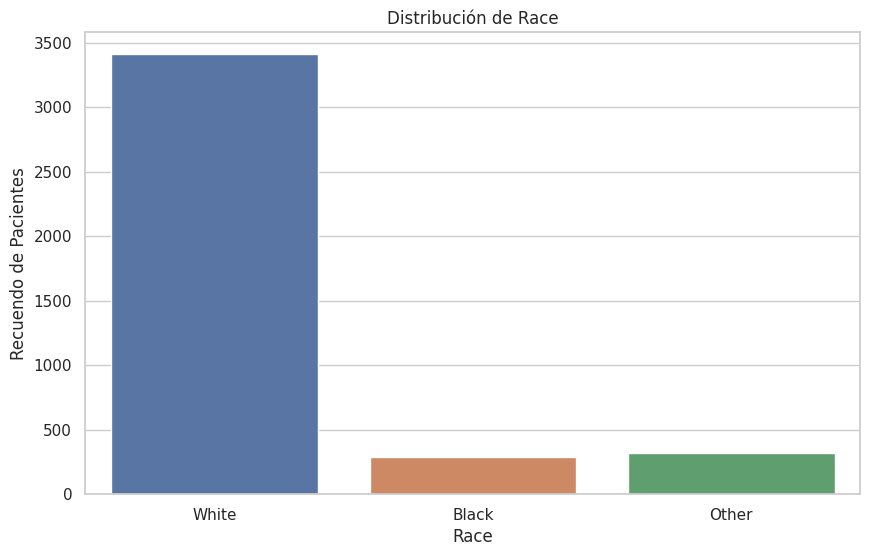

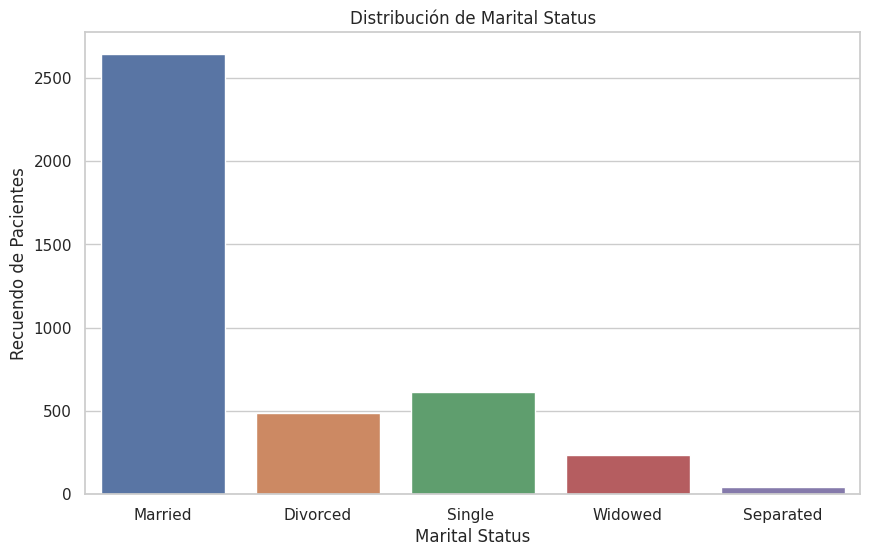

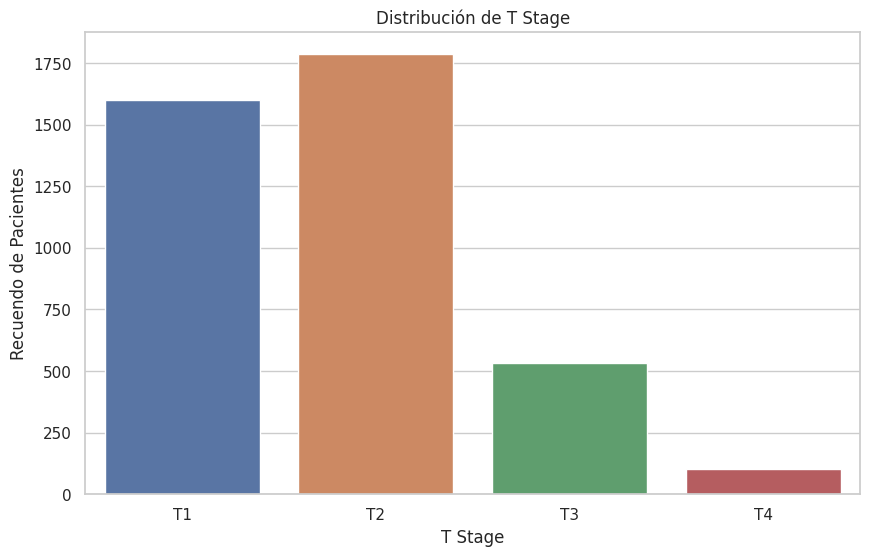

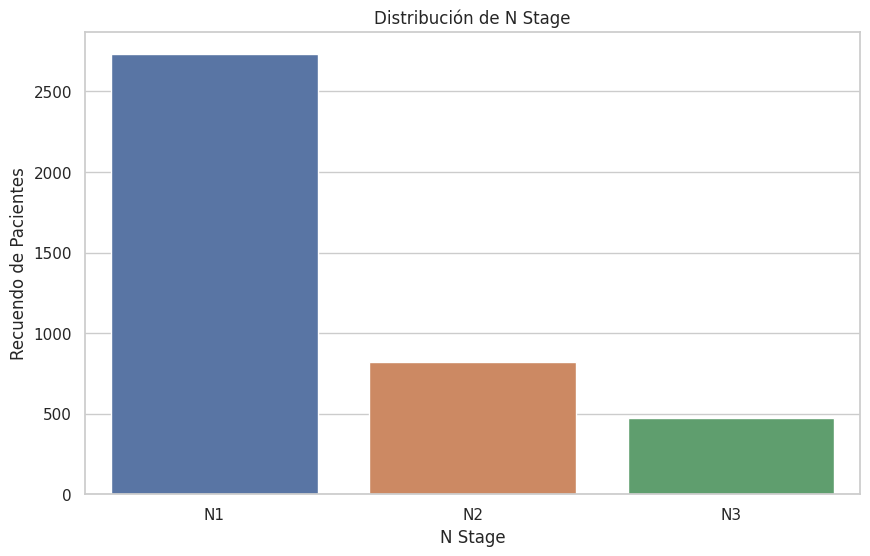

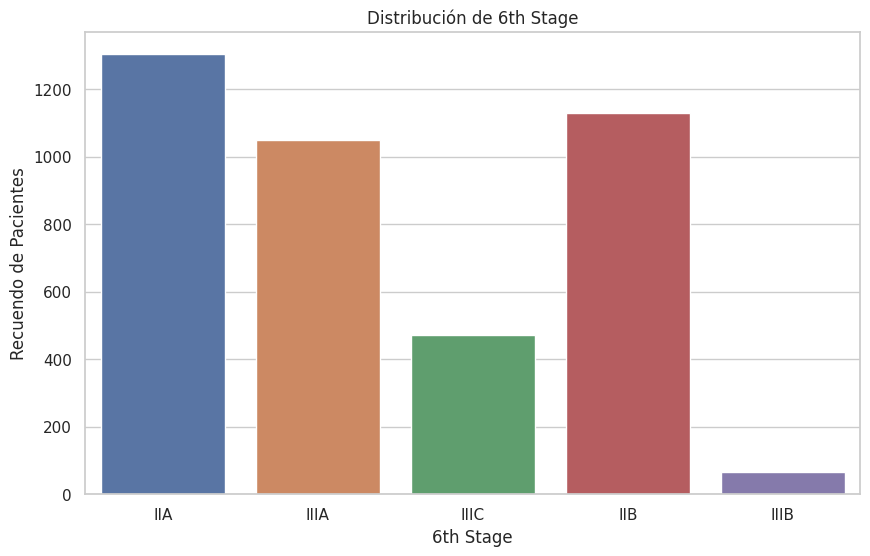

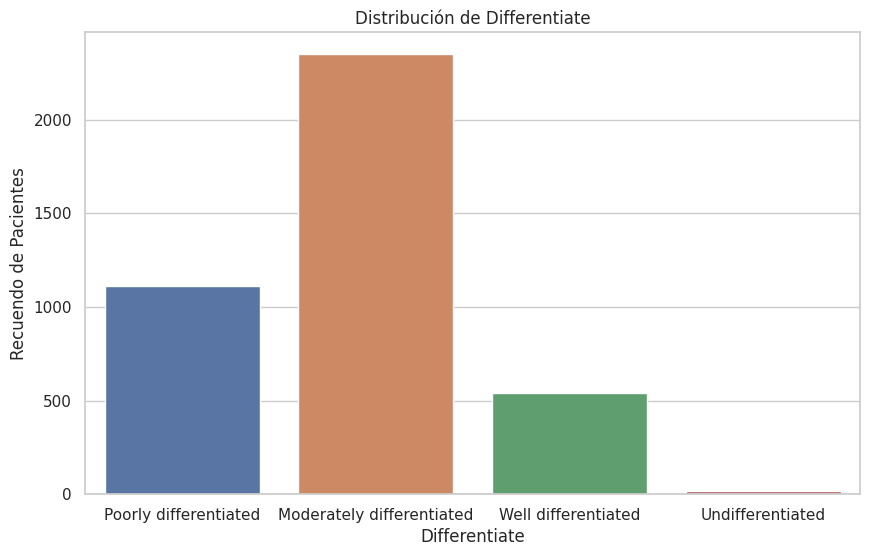

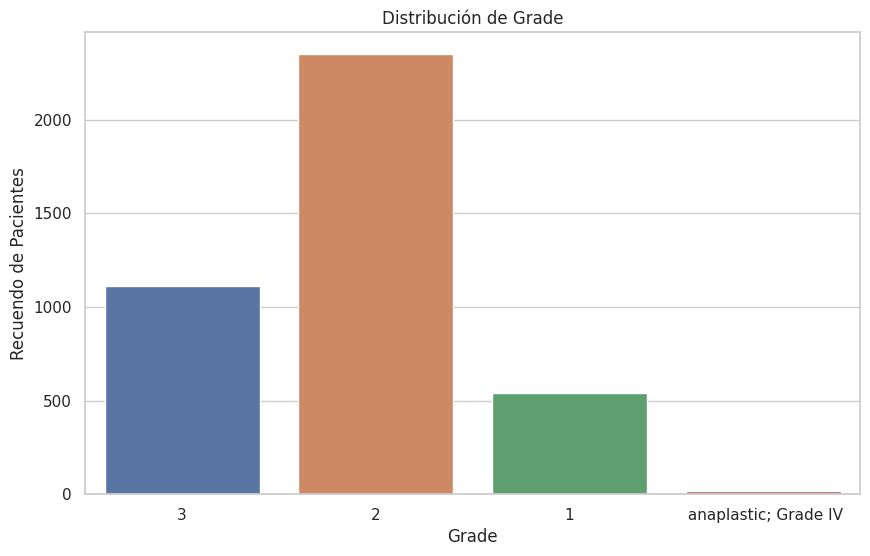

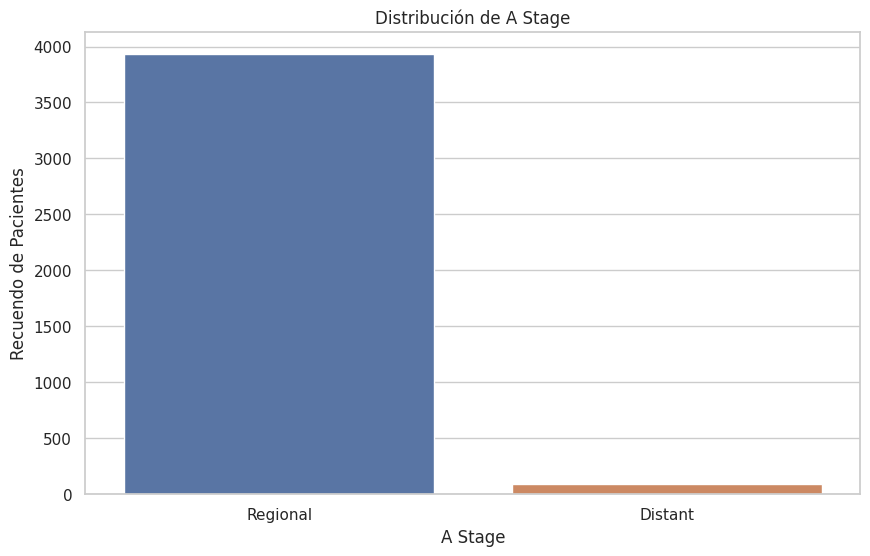

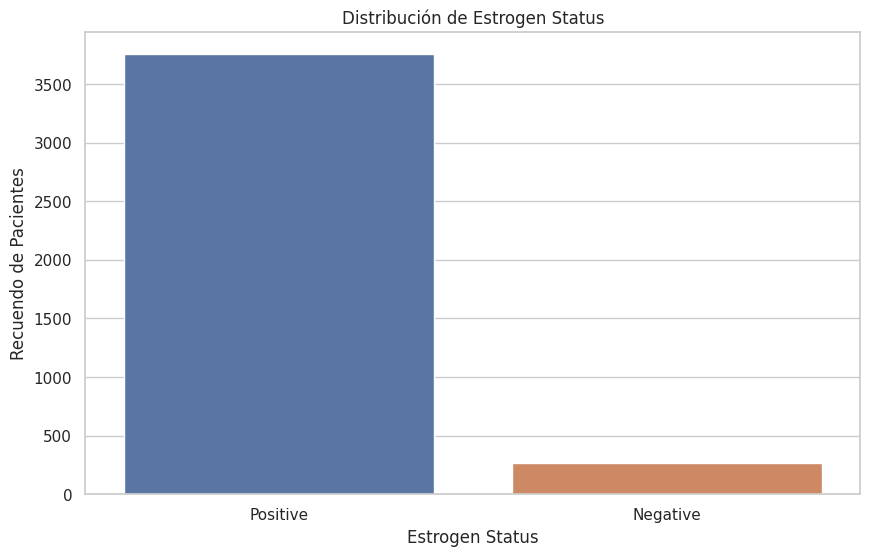

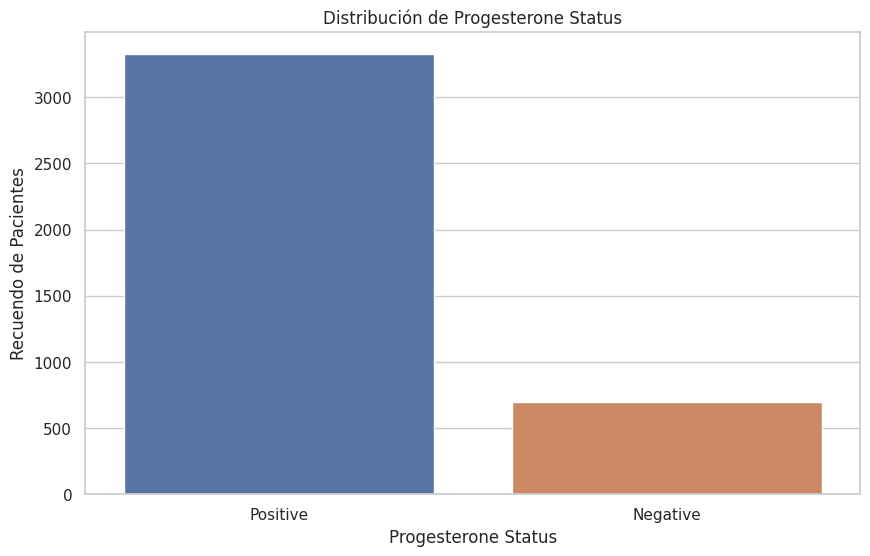

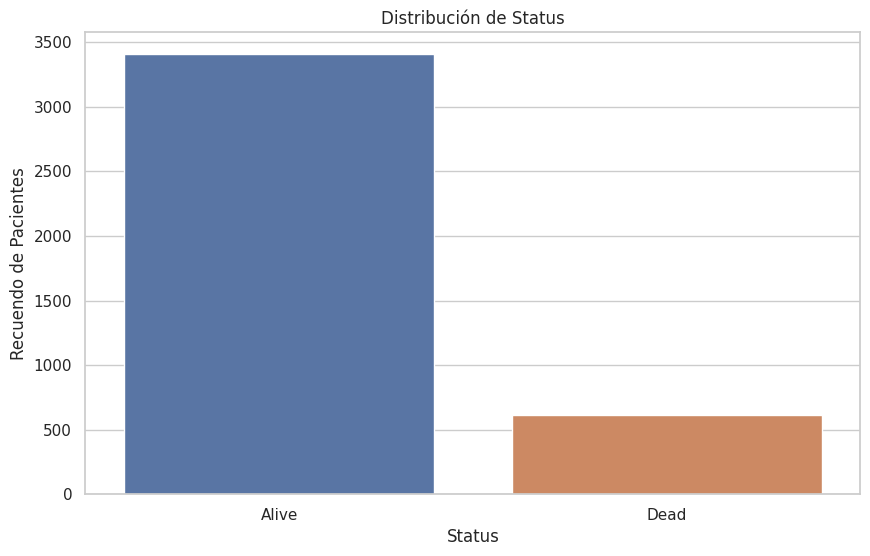

In [ ]:
sns.set(style="whitegrid")
for col in C_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Recuendo de Pacientes')
    plt.show()

Total de Pacientes: 4023
1. Race
  * **White** Total: 3412, Porcentaje 84.81%
  * **Black** Total: 320, Porcentaje 7.95%
  * **Other** Total: 291, Porcentaje 7.23%
2. Marital Status
  * **Married** Total: 2642, Porcentaje 65.67%
  * **Divorced** Total: 486, Porcentaje 12.08%
  * **Single** Total: 615, Porcentaje 15.29%
  * **Separated** Total: 45, Porcentaje 1.12%
  * **Widowed** Total: 235, Porcentaje 5.84%
3. T Stage (Sistema de Estadificación del AJCC (Comité Conjunto Americano del Cáncer) del tamaño del tumor primario)
  * **T1** Total: 1602, Porcentaje 39.82%
  * **T2** Total: 1786, Porcentaje 44.39%
  * **T3** Total: 533, Porcentaje 13.25%
  * **T4** Total: 102, Porcentaje 2.53%
4. N Stage (Sistema de Estadificación del AJCC (Comité Conjunto Americano del Cáncer) afectación de los nodos/ganglios linfáticos)
  * **N1** Total: 2731, Porcentaje 67.88%
  * **N2** Total: 820, Porcentaje 20.38%
  * **N3** Total: 472, Porcentaje 11.73%
5. 6th Stage (Etapa del Cáncer)
  * **IIA** Total: 1304, Porcentaje 32.41%
  * **IIB** Total: 1130, Porcentaje 28.09%
  * **IIIA** Total: 1050, Porcentaje 26.10%
  * **IIIB** Total: 67, Porcentaje 1.67%
  * **IIIC** Total: 472, Porcentaje 11.73%
6. Differentiate
  * **Well differentiated** Total: 543, Porcentaje 13.50%
  * **Moderately differentiated** Total: 2350, Porcentaje 58.41%
  * **Poorly differentiated** Total: 1111, Porcentaje 27.62%
  * **Undifferentiated** Total: 19, Porcentaje 0.47%
7. Grade
  * **1** Total: 543, Porcentaje 13.50%
  * **2** Total: 2350, Porcentaje 58.41%
  * **3** Total: 1111, Porcentaje 27.62%
  * **anaplastic; Grade IV** Total: 19, Porcentaje 0.47%
8. A Stage (Estado)
  * **Regional** Total: 3931, Porcentaje 97.71%
  * **Distant** Total: 92, Porcentaje 2.29%
9. Estrogen Status (Estado receptor de la proteina de estrogeno)
  * **Positive** Total: 3754, Porcentaje 93.31%
  * **Negative** Total: 269, Porcentaje 6.69%
10. Progesterone Status (Estado receptor de la proteina de la progesterona)
  * **Positive** Total: 3325, Porcentaje 82.65%
  * **Negative** Total: 698, Porcentaje 17.35%
11. Status
  * **Alive** Total: 3407, Porcentaje 84.69%
  * **Dead** Total: 616, Porcentaje 15.31%

In [ ]:
total_patients = len(data)
result_dict = {}
result_dfs = []

for col in C_col:
    category_counts = data[col].value_counts()
    col_result_dict = {}
    for category in category_counts.index:
        total_category_patients = len(data[data[col] == category])
        dead_count = len(data[(data[col] == category) & (data['Status'] == 'Dead')])
        dead_percentage = (dead_count / total_category_patients) * 100
        col_result_dict[category] = {"Recuento Total de Pacientes": total_category_patients, "Recuento de Pacientes Muertos": dead_count, "Porcentaje de Pacientes Muertos": dead_percentage}
    result_df = pd.DataFrame(col_result_dict).transpose()
    result_dict[col] = result_df
    result_dfs.append(result_df)

for col, result_df in zip(C_col, result_dfs):
    print(f"\nResultados para la columna '{col}':")
    display(result_df)
    print("-" * 50)


Resultados para la columna 'Race':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
White,3412.0,510.0,14.947245
Other,320.0,33.0,10.312500
Black,291.0,73.0,25.085911


--------------------------------------------------

Resultados para la columna 'Marital Status':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
Married,2642.0,358.0,13.550341
Single,615.0,104.0,16.910569
Divorced,486.0,90.0,18.518519
Widowed,235.0,49.0,20.851064
Separated,45.0,15.0,33.333333


--------------------------------------------------

Resultados para la columna 'T Stage':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
T2,1786.0,303.0,16.965286
T1,1602.0,157.0,9.800250
T3,533.0,116.0,21.763602
T4,102.0,40.0,39.215686


--------------------------------------------------

Resultados para la columna 'N Stage':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
N1,2731.0,270.0,9.886488
N2,820.0,165.0,20.121951
N3,472.0,181.0,38.347458


--------------------------------------------------

Resultados para la columna '6th Stage':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
IIA,1304.0,96.0,7.361963
IIB,1130.0,135.0,11.946903
IIIA,1050.0,184.0,17.523810
IIIC,472.0,181.0,38.347458
IIIB,67.0,20.0,29.850746


--------------------------------------------------

Resultados para la columna 'Differentiate':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
Moderately differentiated,2350.0,305.0,12.978723
Poorly differentiated,1111.0,263.0,23.672367
Well differentiated,543.0,39.0,7.182320
Undifferentiated,19.0,9.0,47.368421


--------------------------------------------------

Resultados para la columna 'Grade':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
2,2350.0,305.0,12.978723
3,1111.0,263.0,23.672367
1,543.0,39.0,7.182320
anaplastic; Grade IV,19.0,9.0,47.368421


--------------------------------------------------

Resultados para la columna 'A Stage':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
Regional,3931.0,581.0,14.779954
Distant,92.0,35.0,38.043478


--------------------------------------------------

Resultados para la columna 'Estrogen Status':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
Positive,3754.0,508.0,13.532232
Negative,269.0,108.0,40.148699


--------------------------------------------------

Resultados para la columna 'Progesterone Status':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
Positive,3325.0,412.0,12.390977
Negative,698.0,204.0,29.226361


--------------------------------------------------

Resultados para la columna 'Status':


,Recuento Total de Pacientes,Recuento de Pacientes Muertos,Porcentaje de Pacientes Muertos
Alive,3407.0,0.0,0.0
Dead,616.0,616.0,100.0


--------------------------------------------------


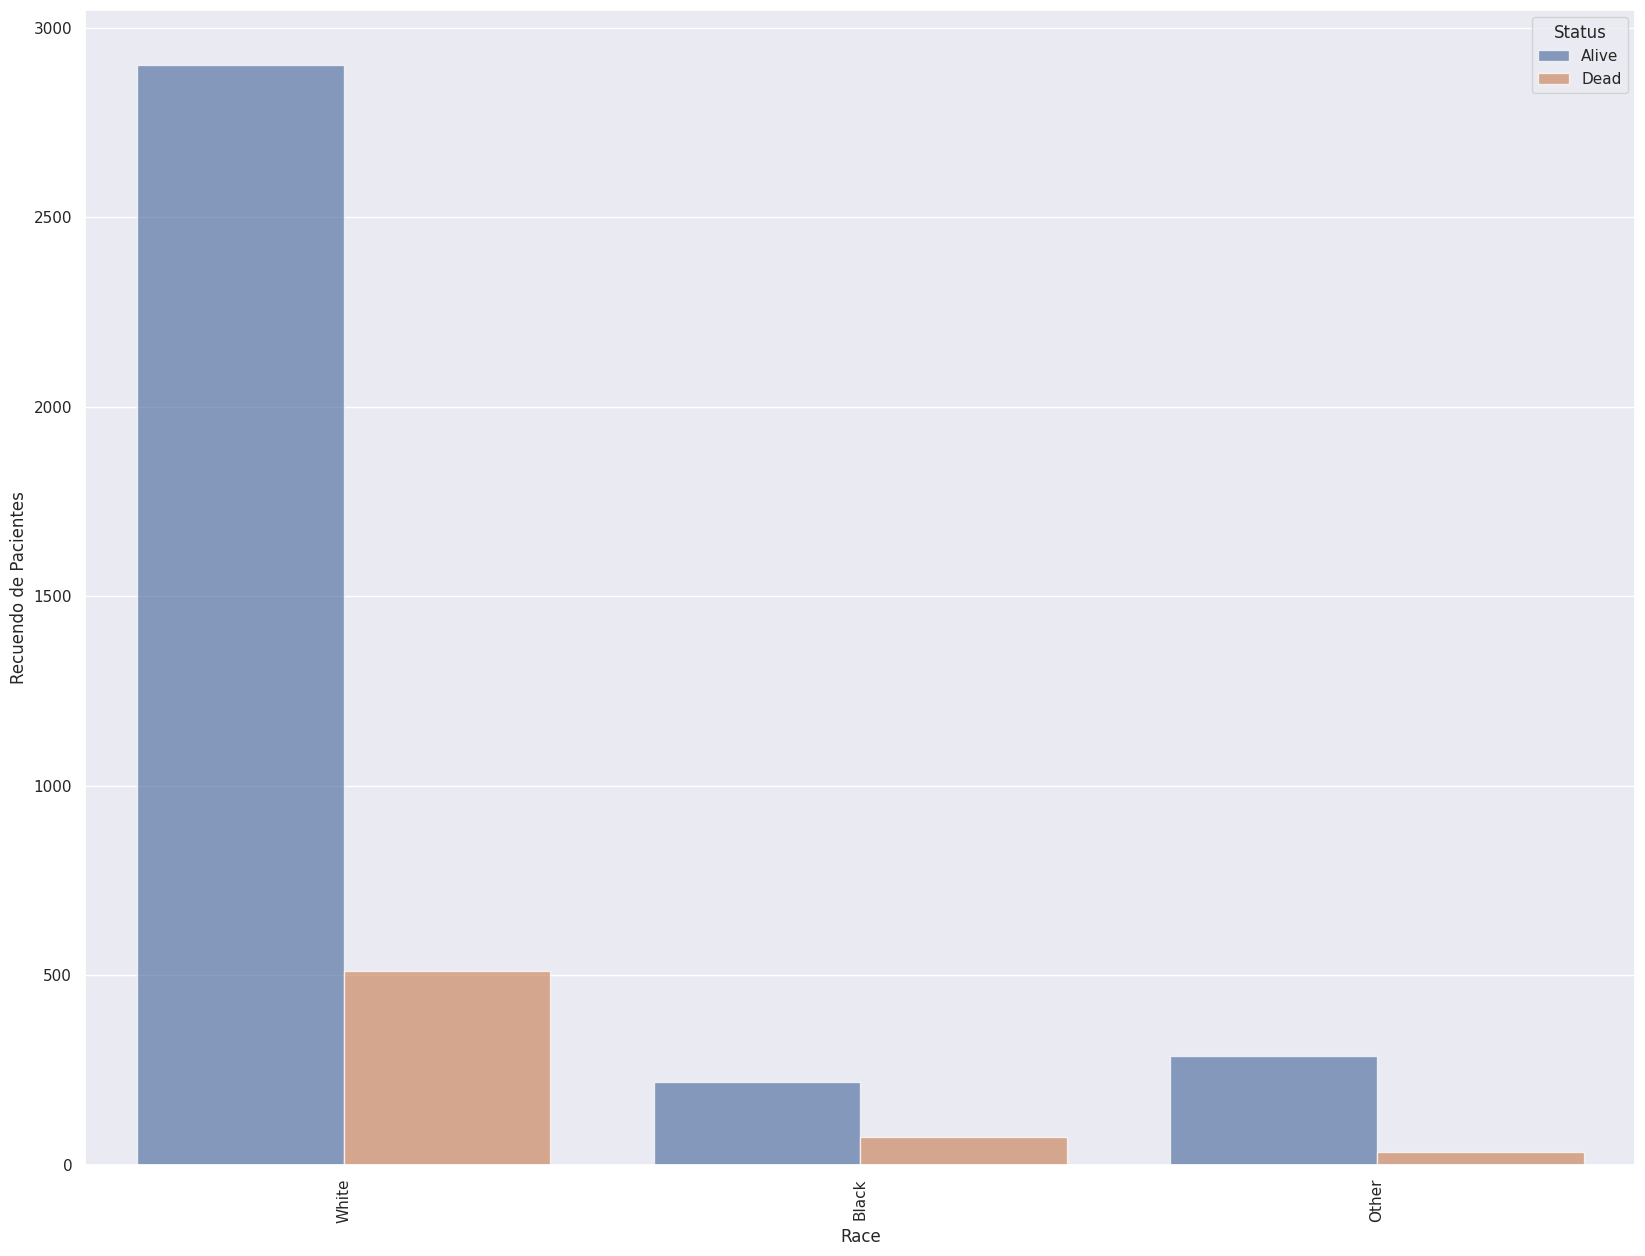

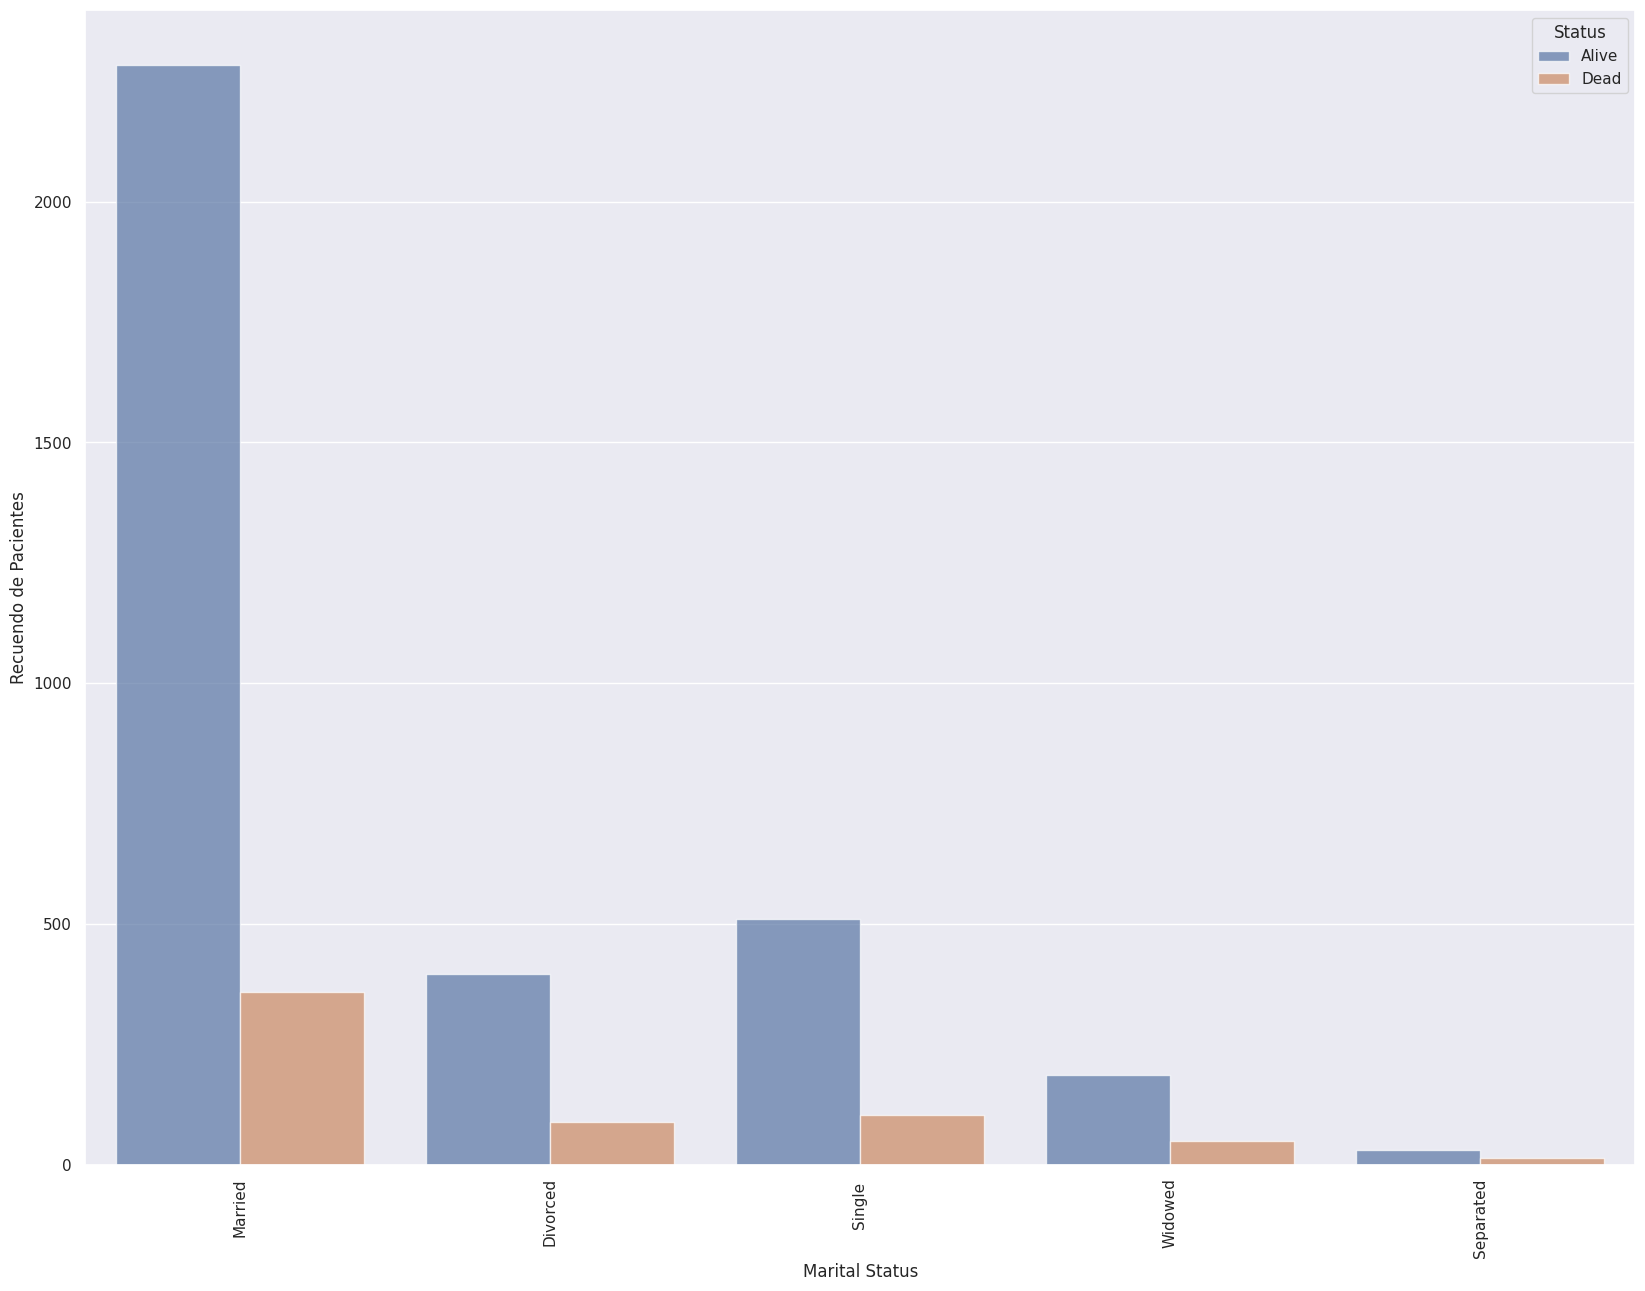

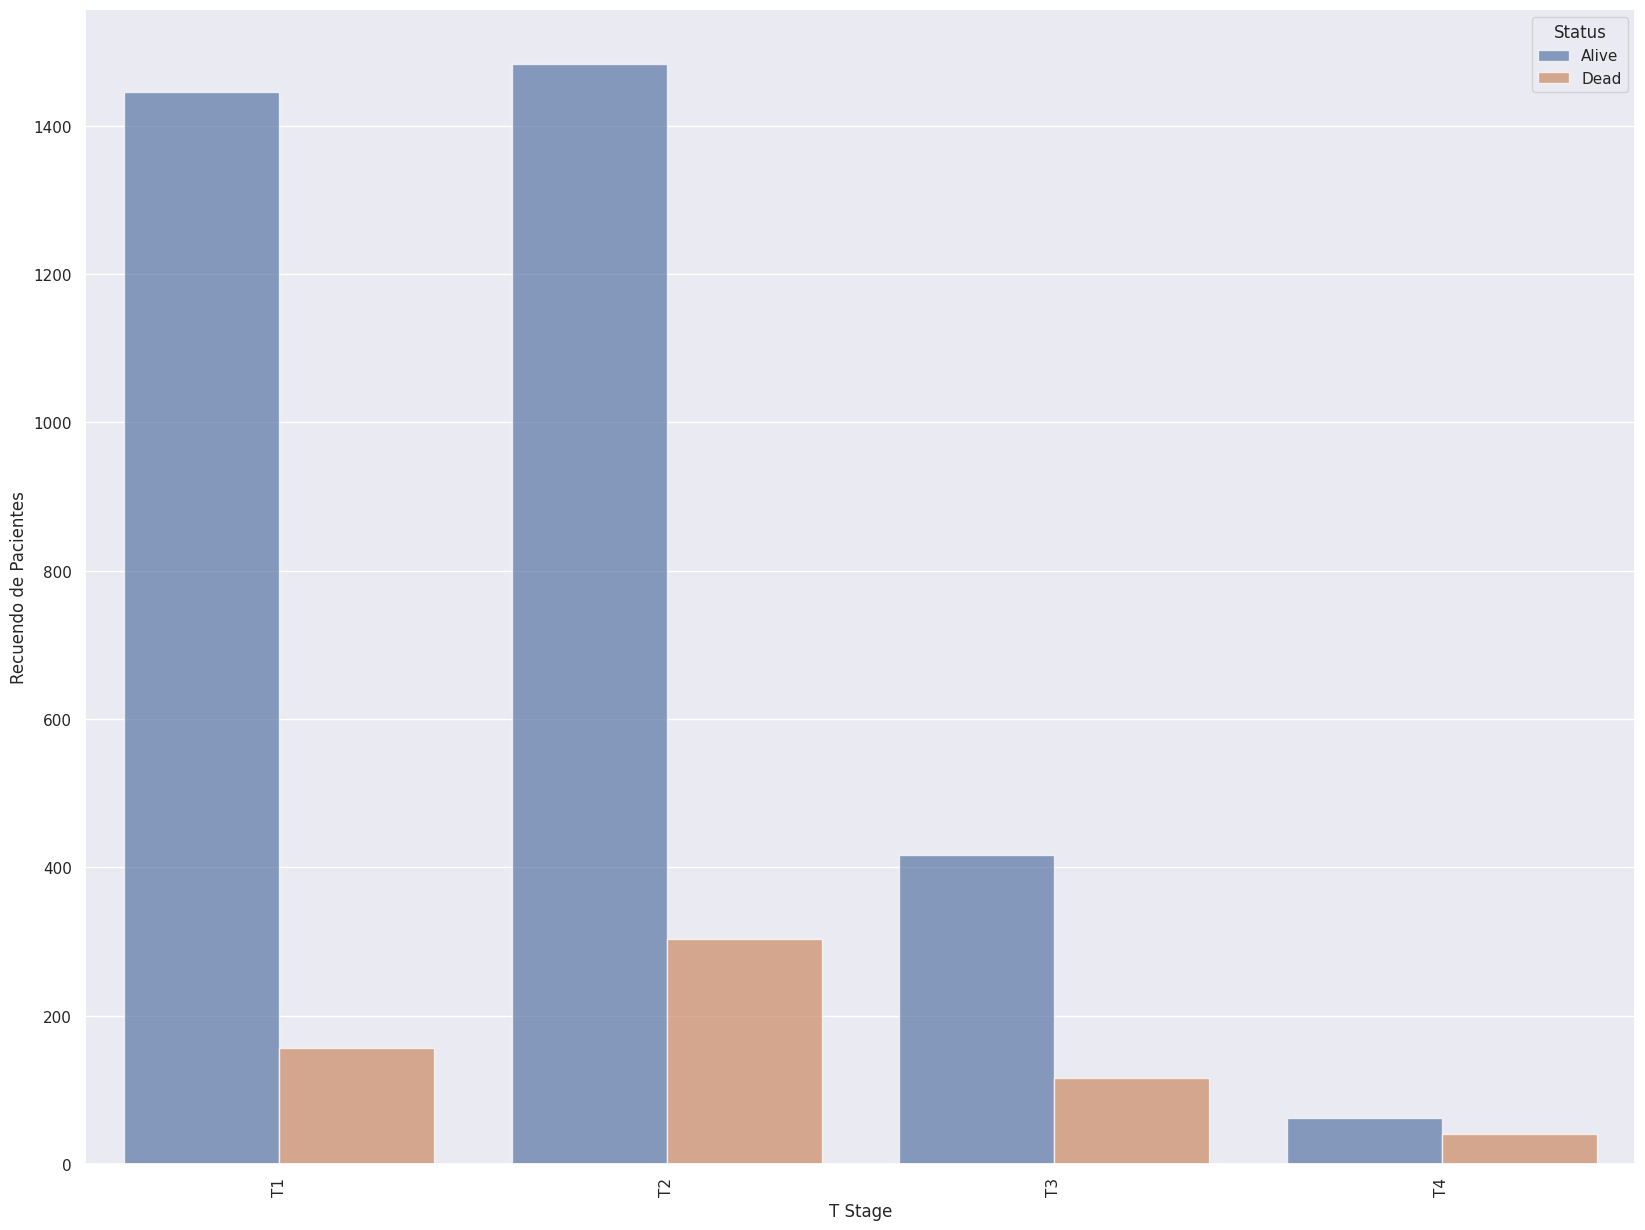

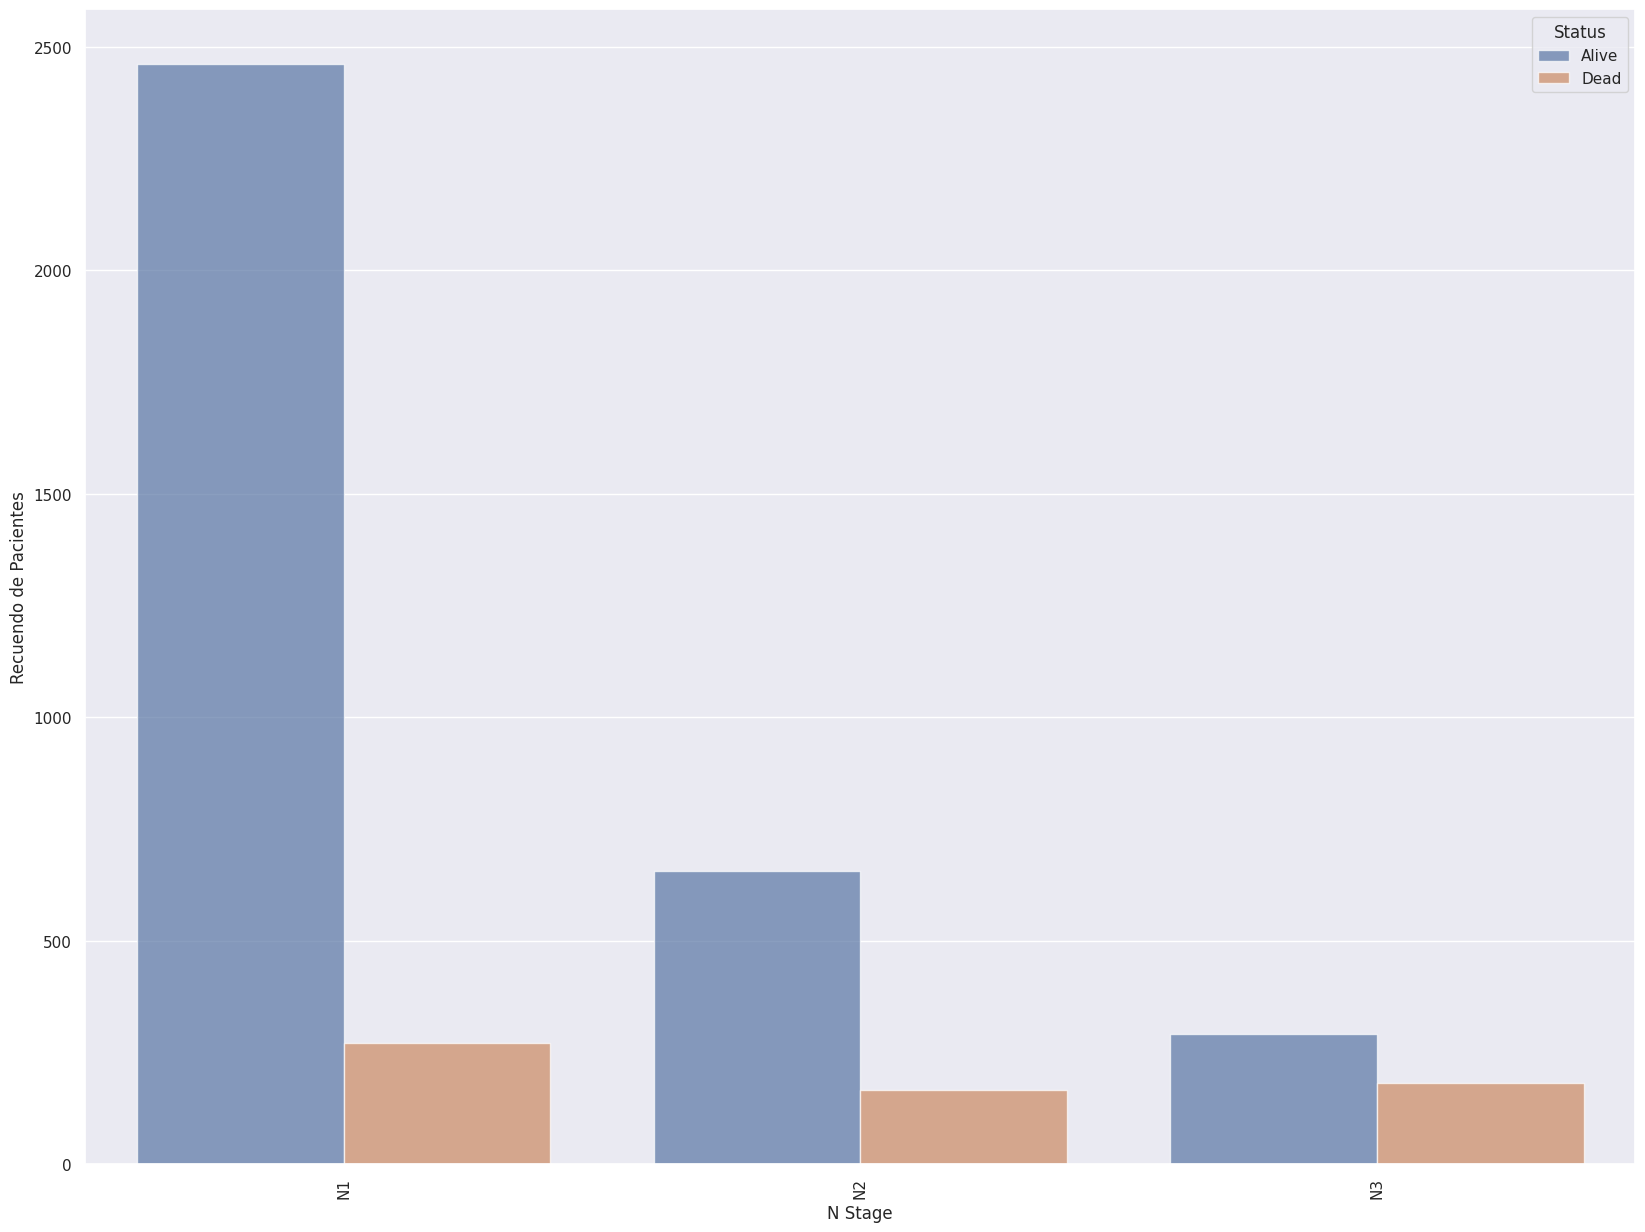

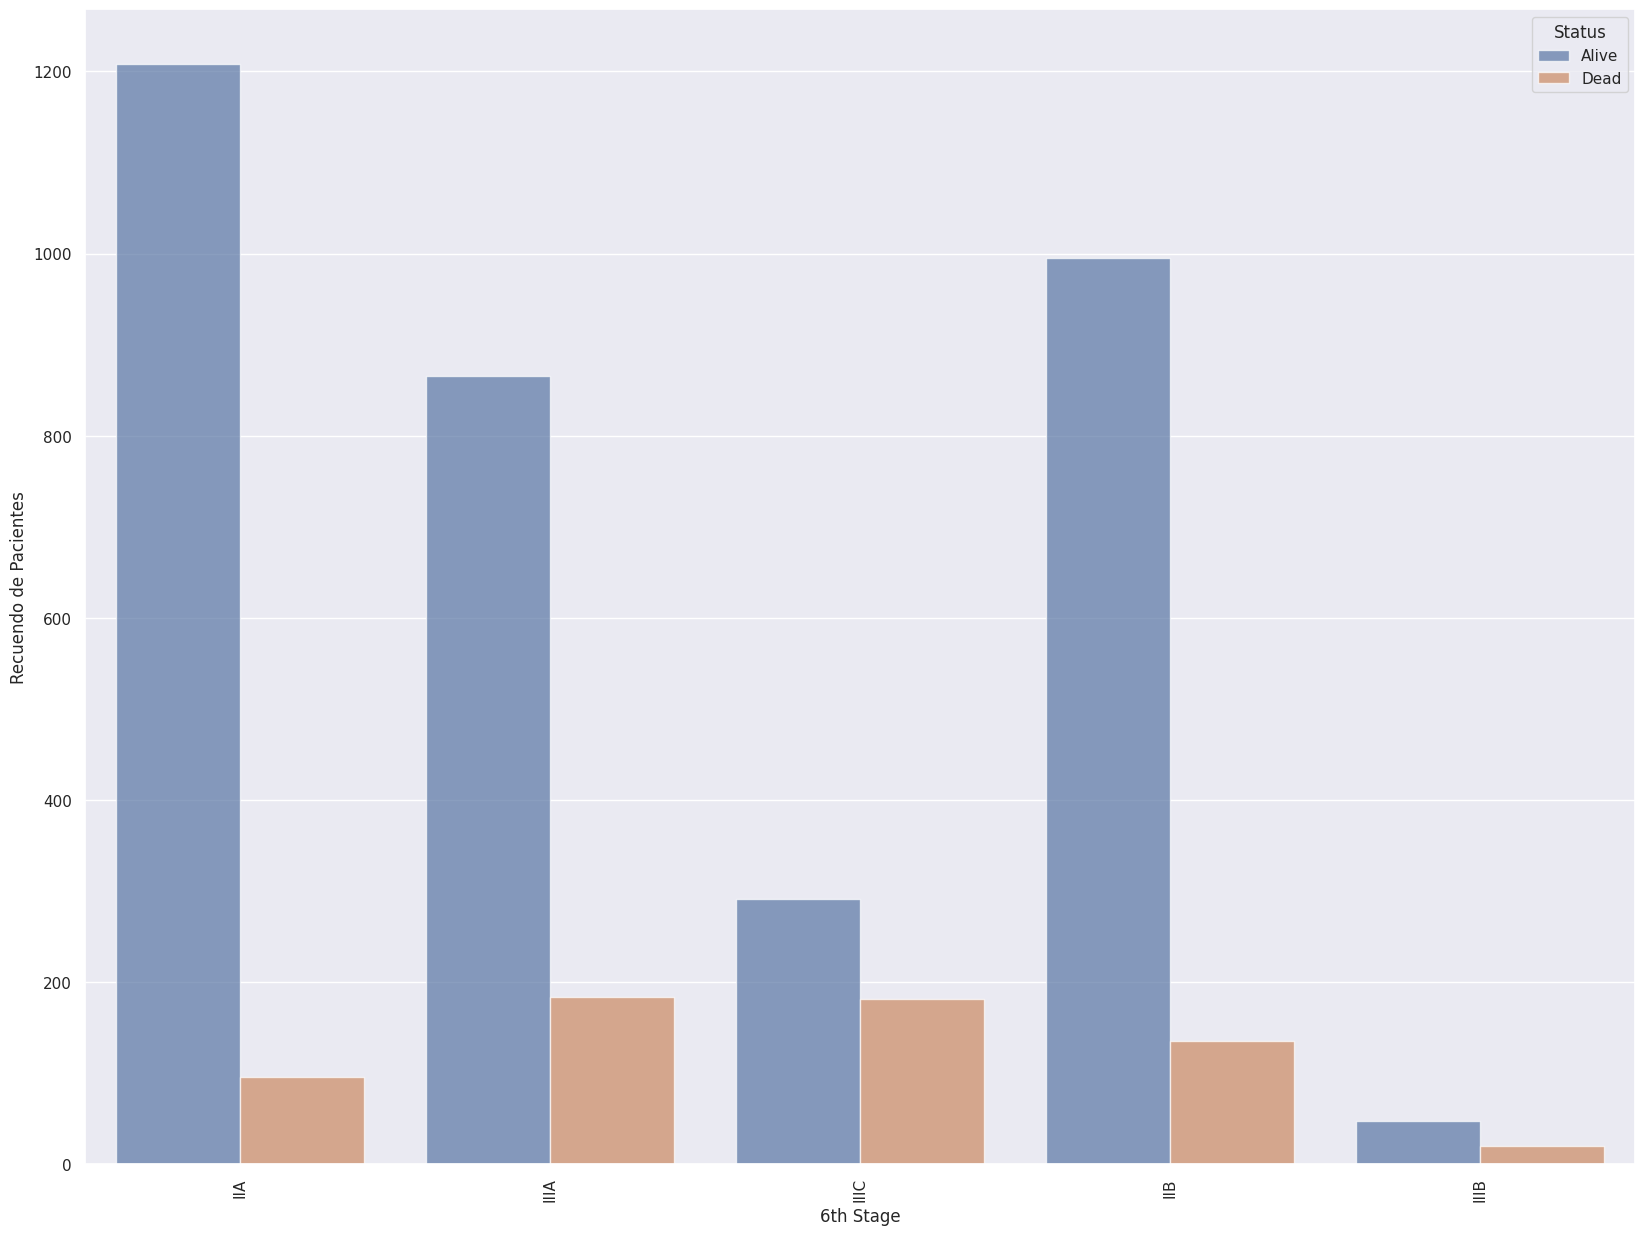

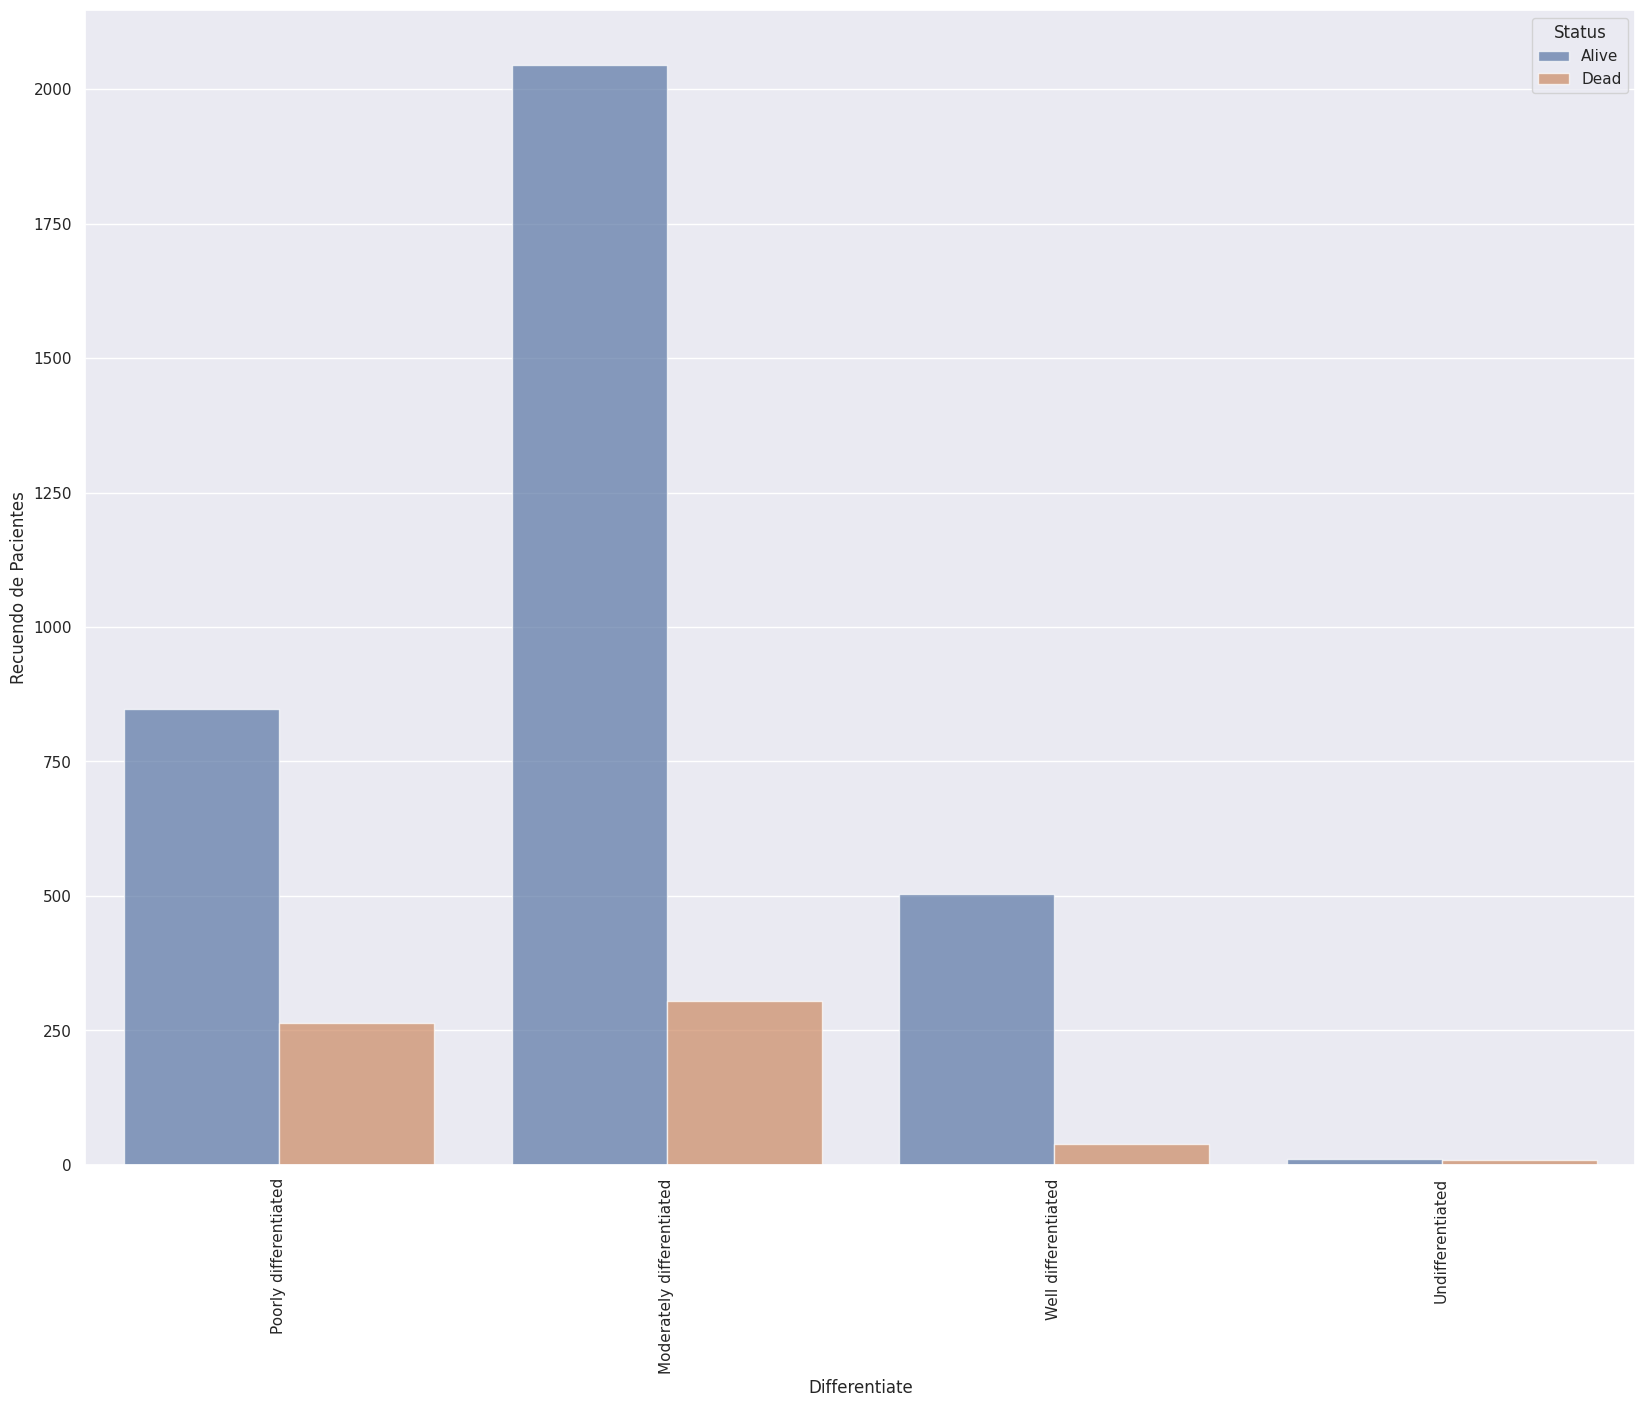

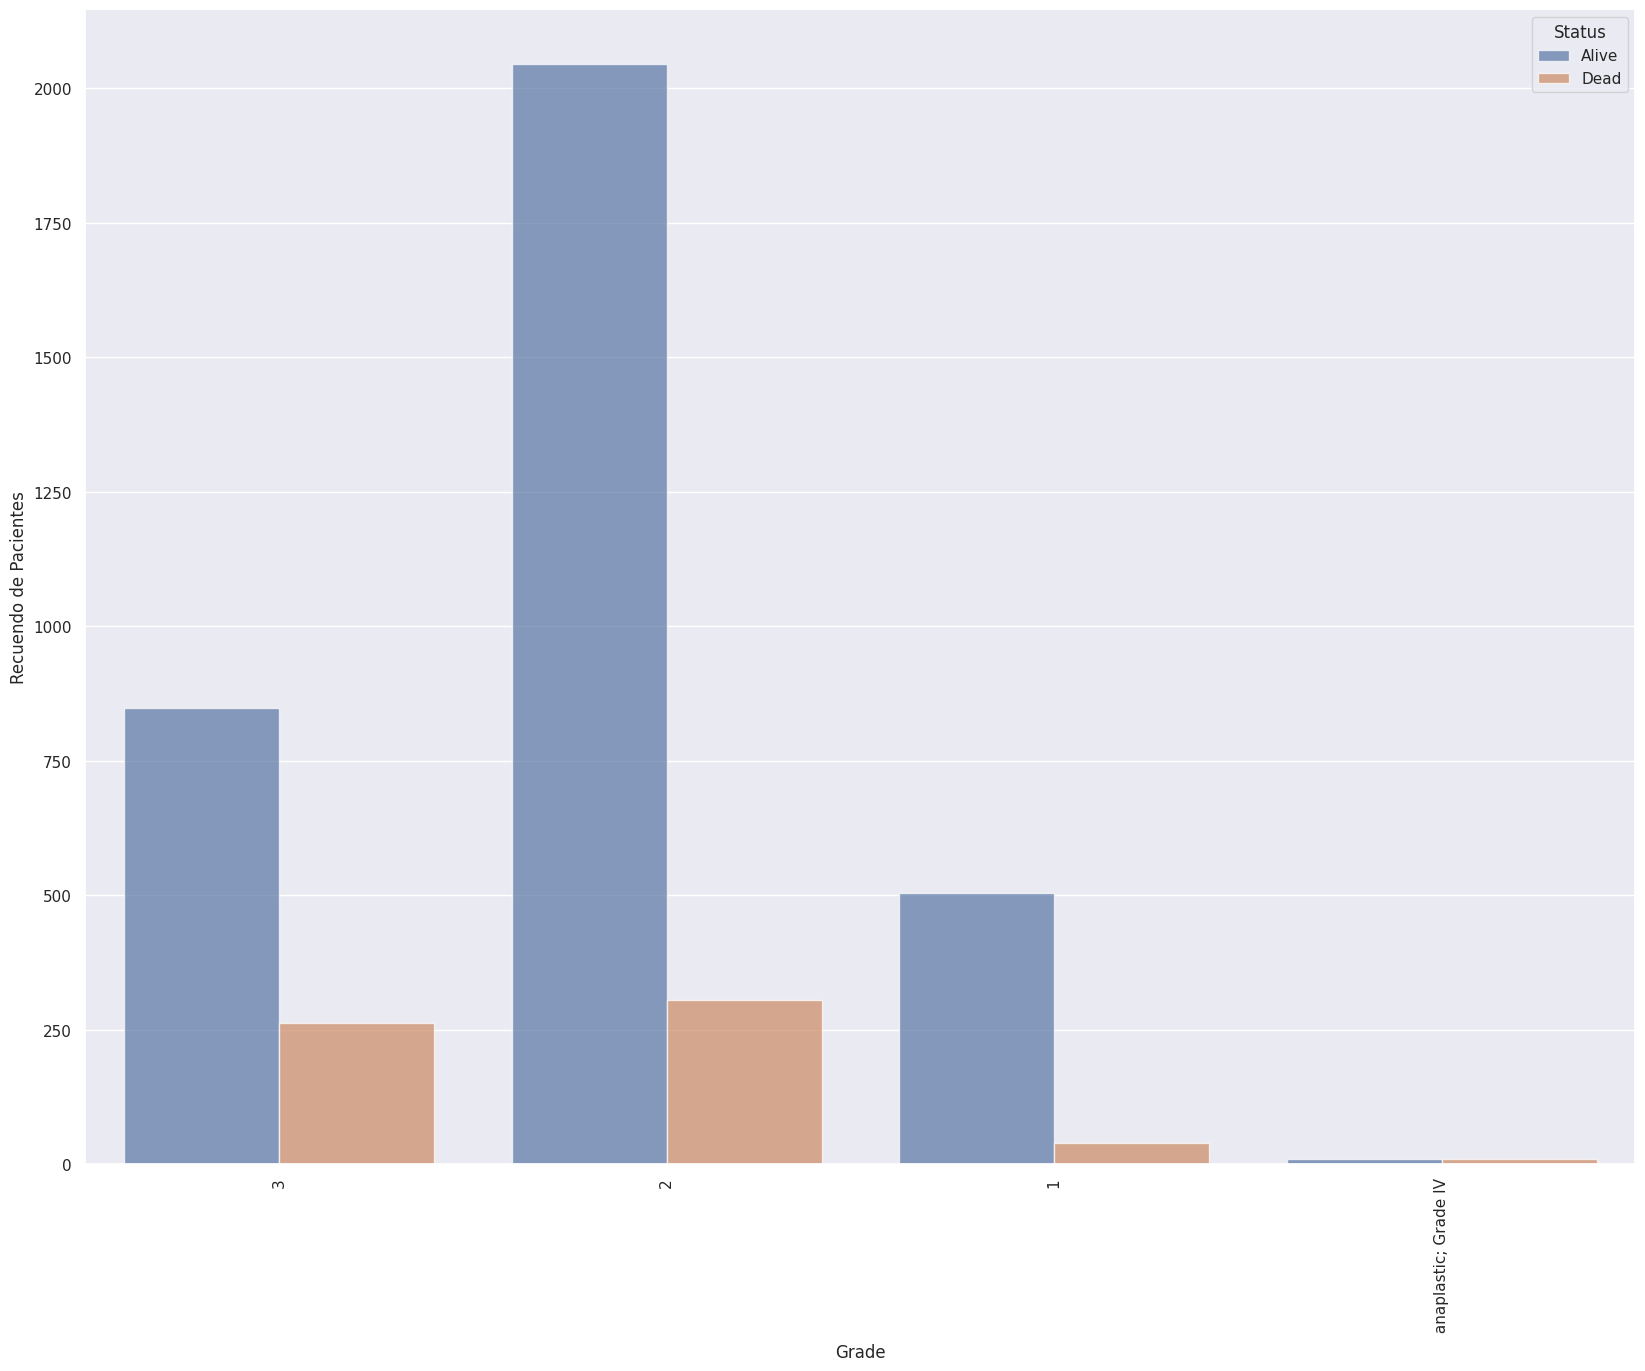

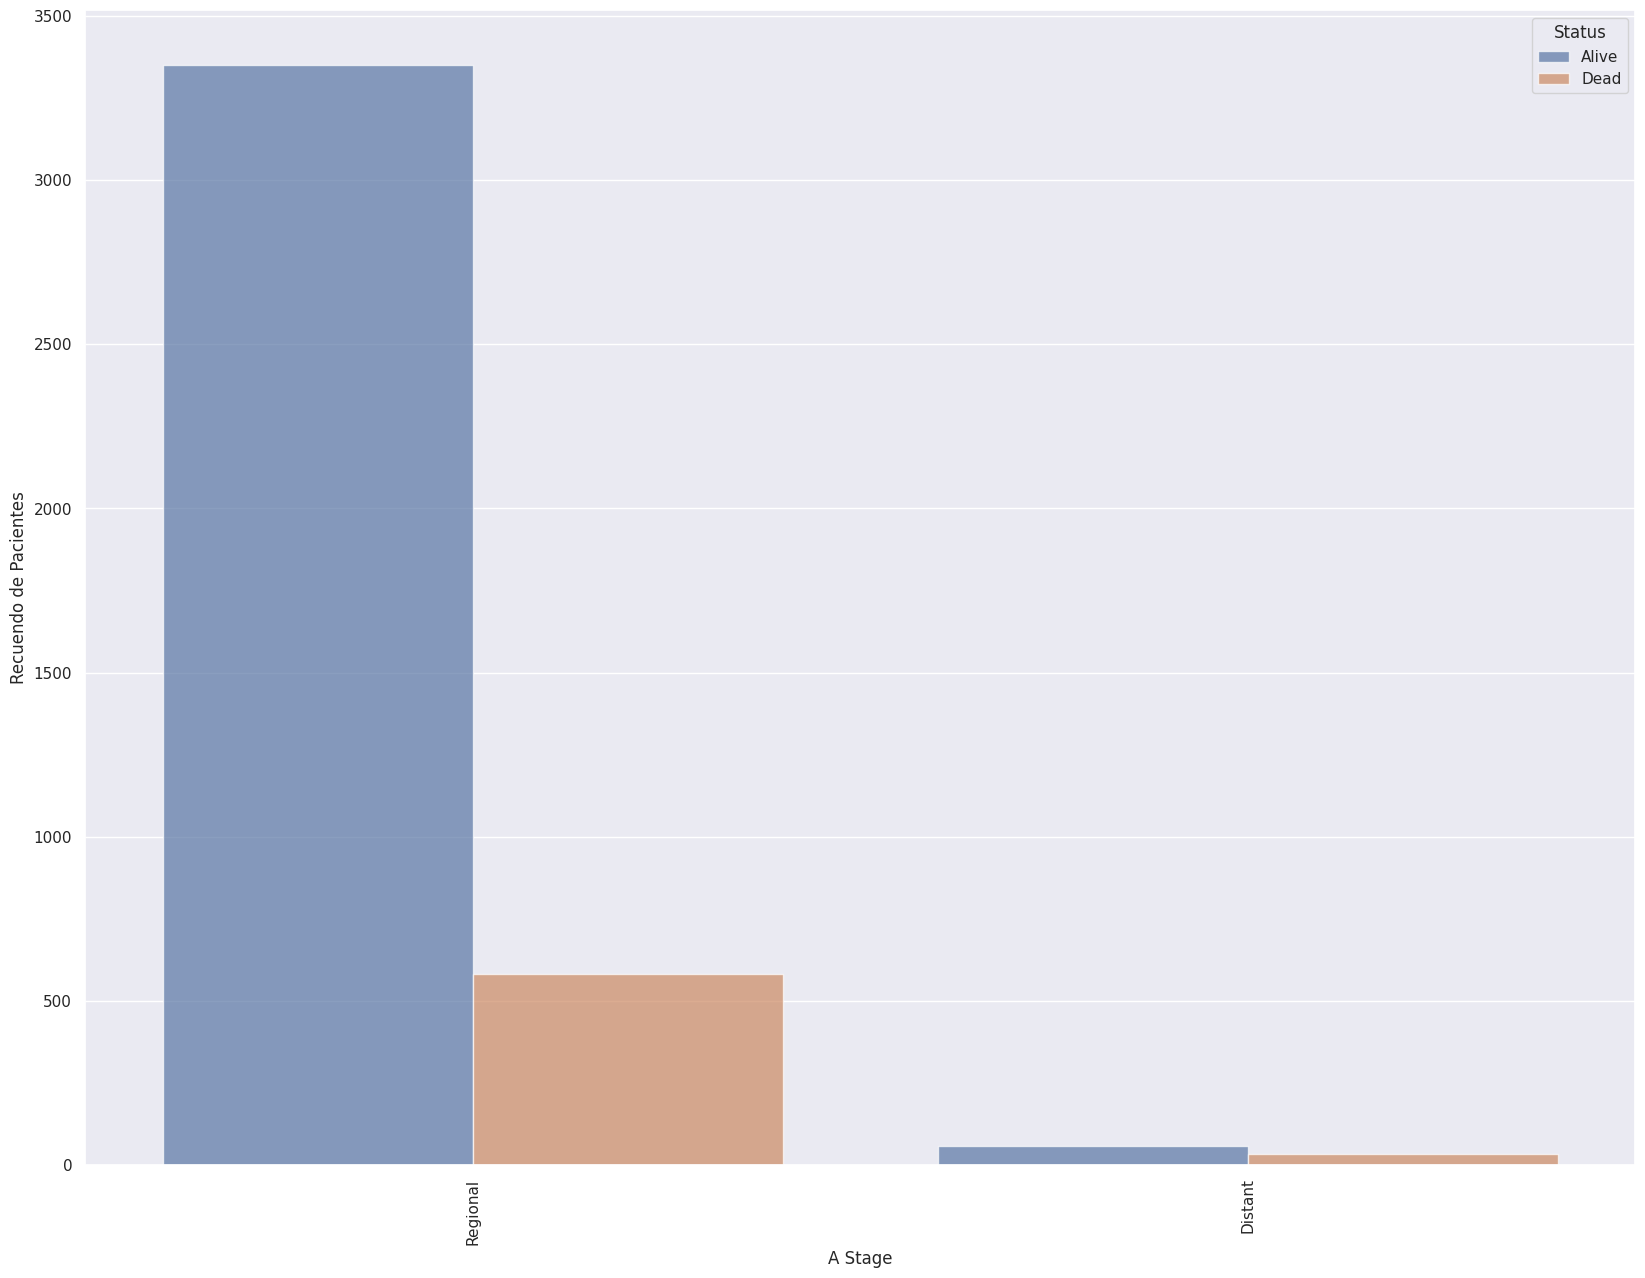

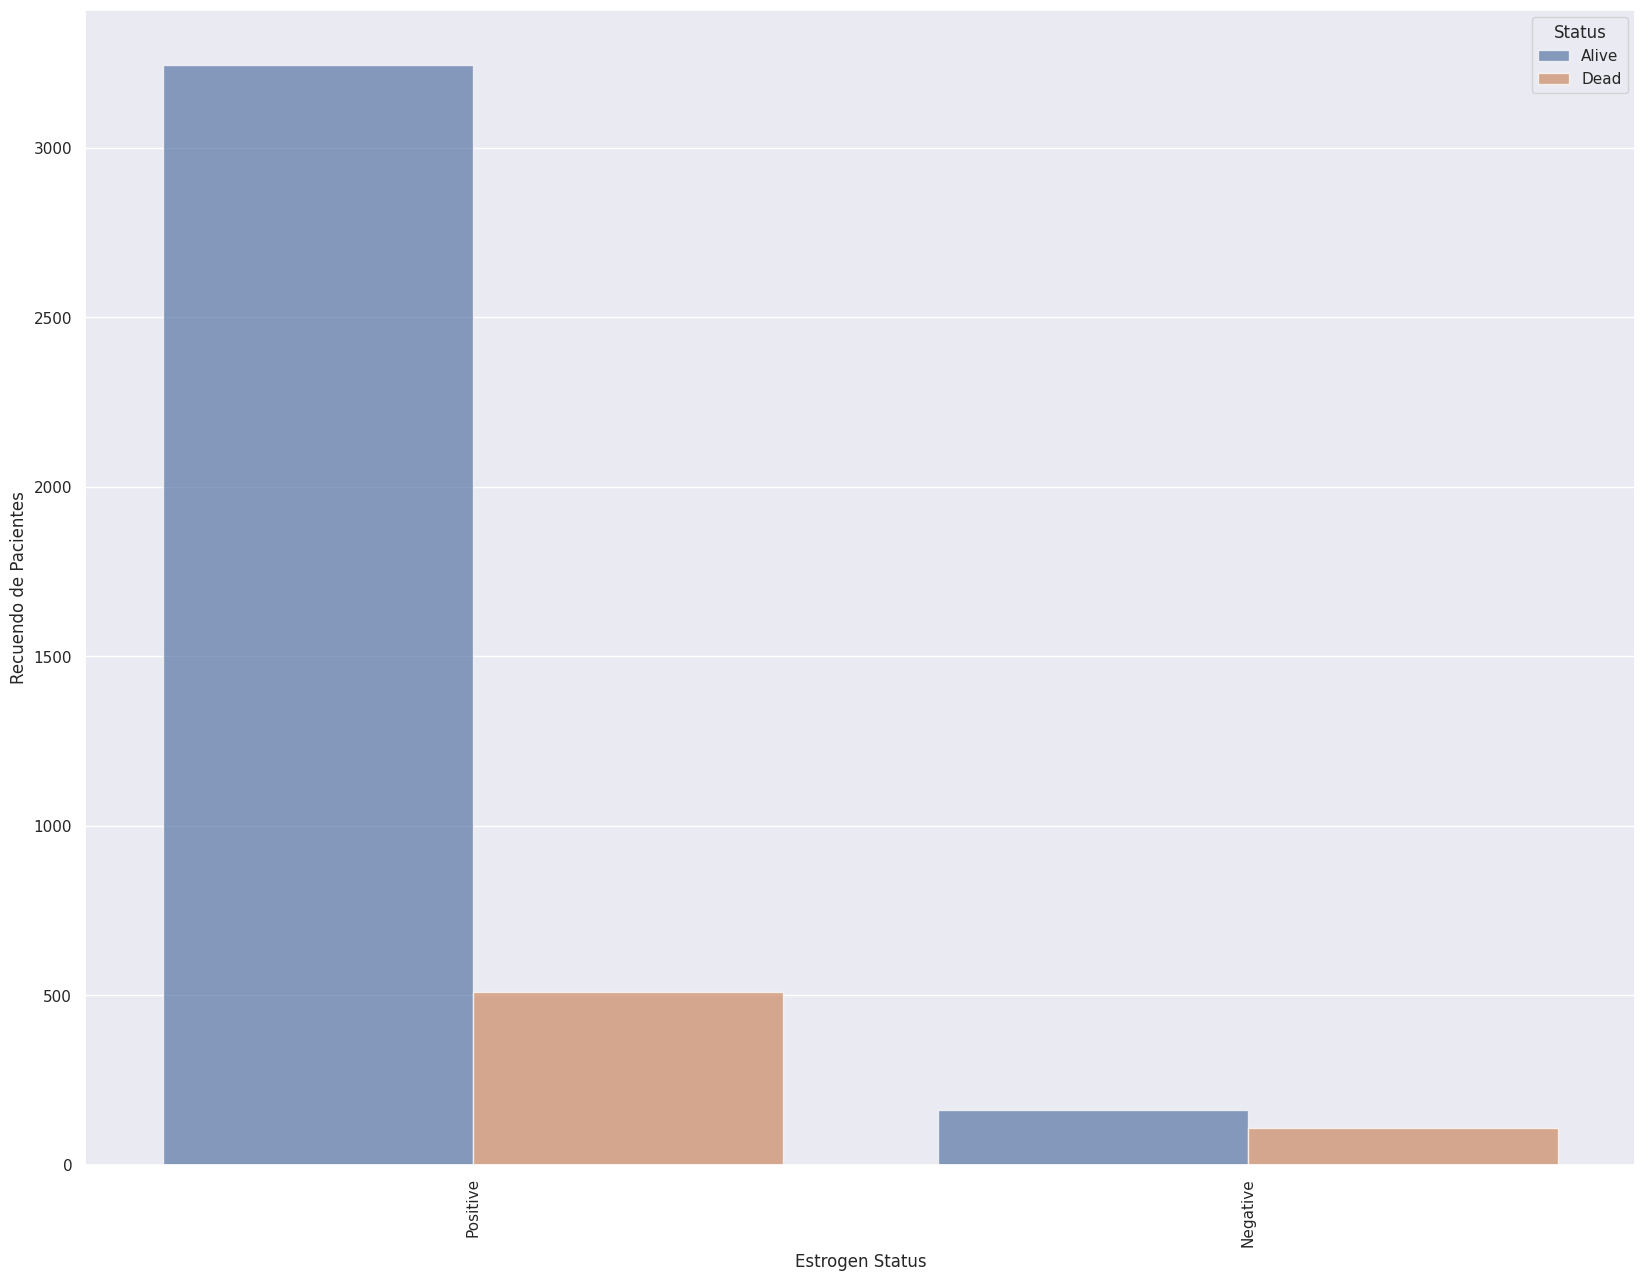

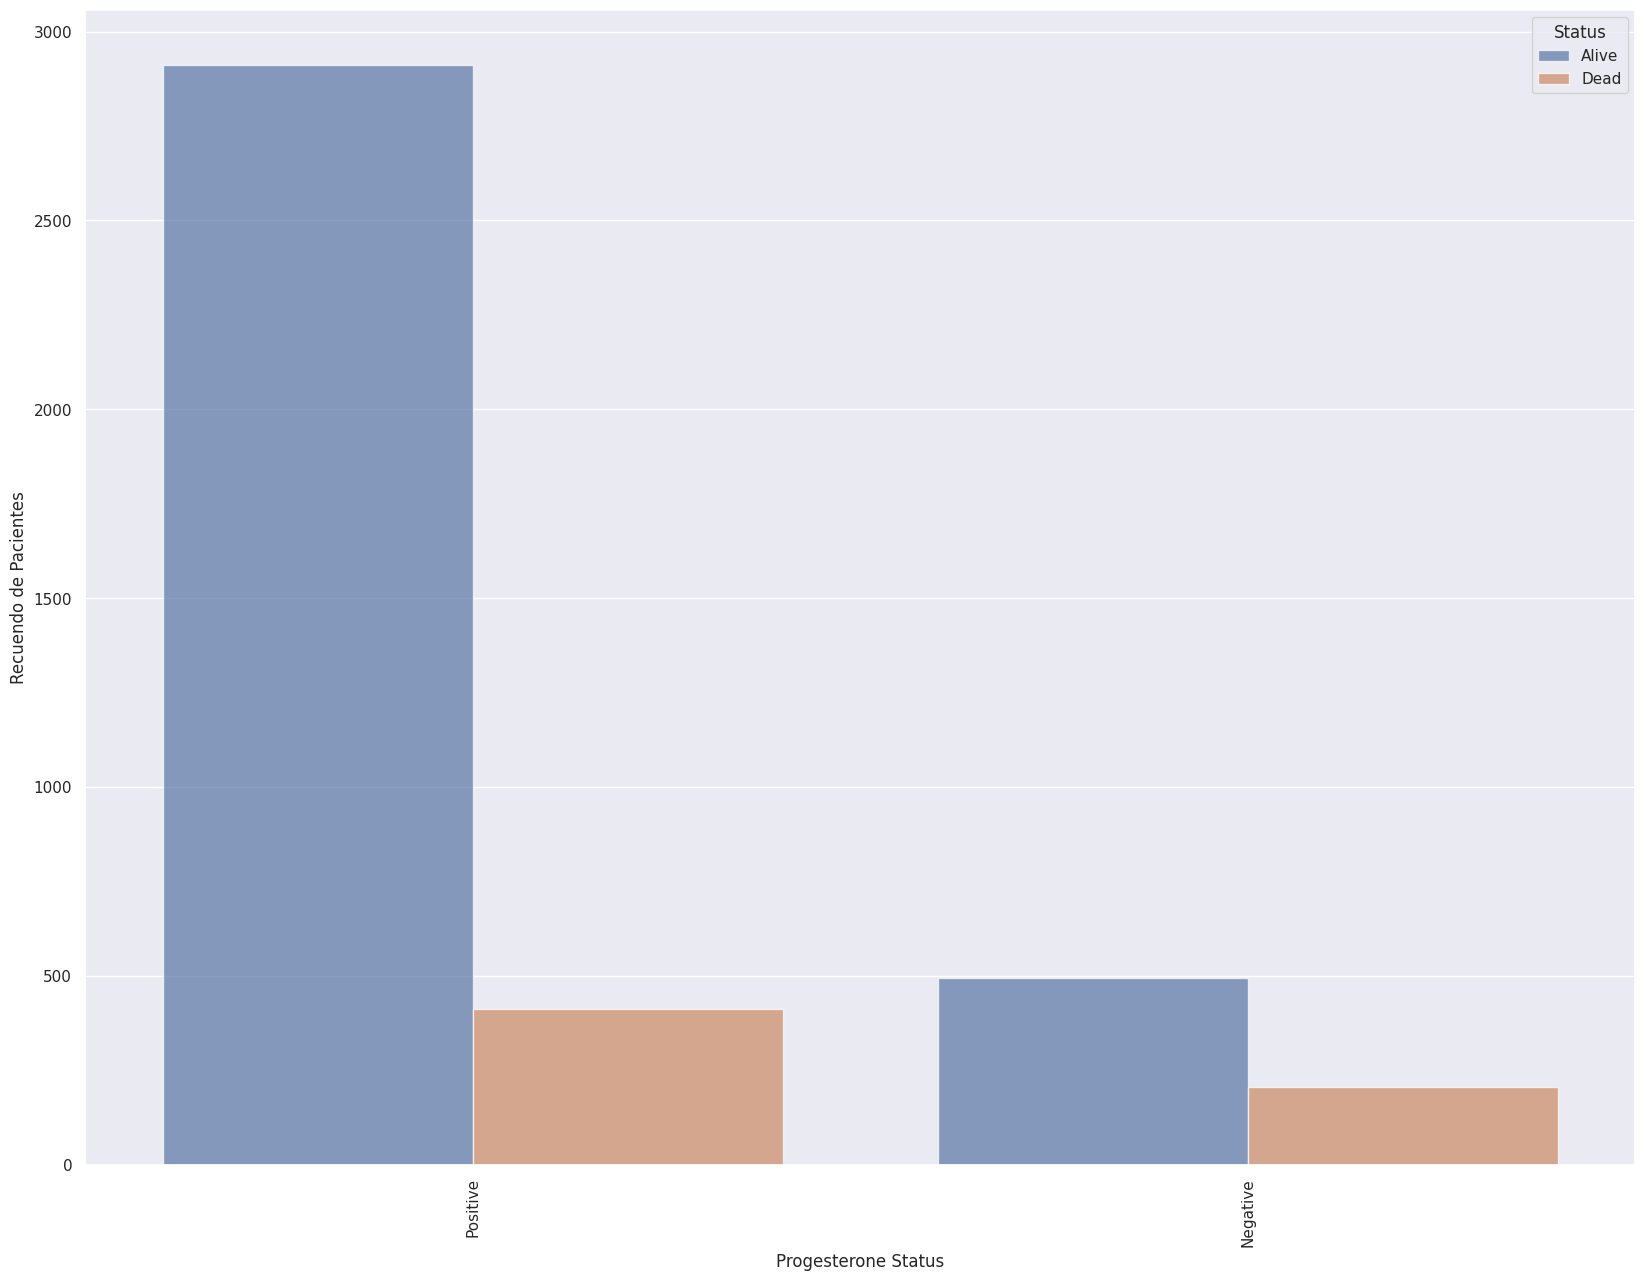

In [ ]:
for i in C_col:
    countplot(data,i)

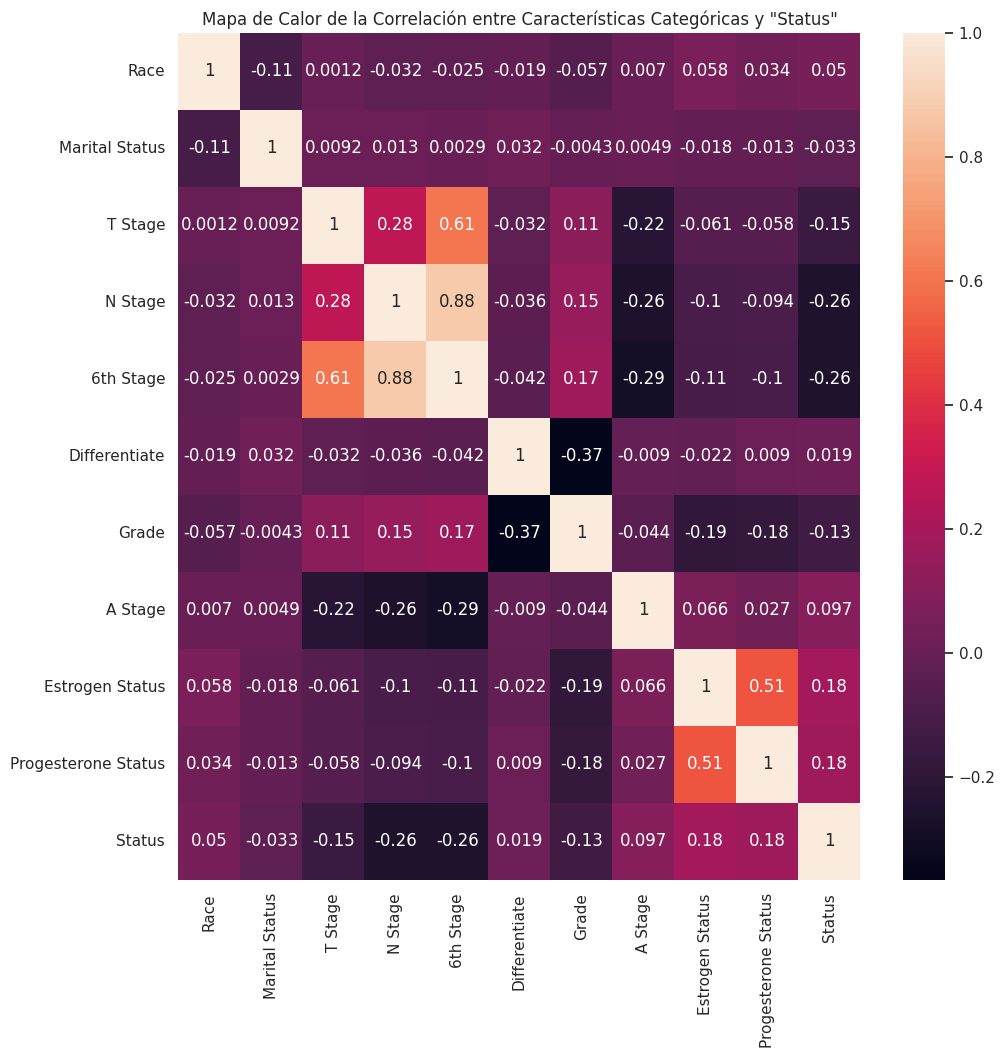

In [ ]:
df_cat=data.copy()
label_encoder = preprocessing.LabelEncoder()
df_cat=data.drop(columns=N_col)
df_cat['Status'] = data['Status'].replace({'Alive': 1, 'Dead': 0})
for col in C_col:
    if col != "Status":
        df_cat[col] = label_encoder.fit_transform(data[col])

plt.figure(figsize=(11,11), dpi=100)
sns.heatmap(df_cat.corr(), annot=True)
plt.title('Mapa de Calor de la Correlación entre Características Categóricas y "Status"');

## FEATURE ENGINEERING

In [ ]:
train2=data.copy()
train2['Status'] = data['Status'].replace({'Alive': 1, 'Dead': 0})

label_encoder = preprocessing.LabelEncoder()

#Para el segundo modelo se escogieron las categorias según 3 aspectos
#1. La correlación que tenga con "Status"
#2. Su peso en la muerte de pacientes
#3. Aporta más información o información nueva

train2['Grade']= label_encoder.fit_transform(data['Grade']) #1, 2, 3
train2['N Stage']= label_encoder.fit_transform(data['N Stage']) #1 ,2, 3
train2['Progesterone Status']= label_encoder.fit_transform(data['Progesterone Status']) #1, 2
train2['Estrogen Status']= label_encoder.fit_transform(data['Estrogen Status']) #1, 2
train2['A Stage']= label_encoder.fit_transform(data['A Stage']) #2


train2['RNP / RNE'] = data['Regional Node Positive']/data['Regional Node Examined'] #Mirar la relación de nodos positivos sobre el total de examinados

X_full2 = train2.drop('Status',axis = 1)
X_full2 = X_full2.select_dtypes(include=["number"])
X_full2

,Age,N Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,RNP / RNE
0,68,0,3,1,4,1,1,24,1,60,0.041667
1,50,1,2,1,35,1,1,14,5,62,0.357143
2,58,2,2,1,63,1,1,14,7,75,0.500000
3,58,0,3,1,18,1,1,2,1,84,0.500000
4,47,0,3,1,41,1,1,3,1,50,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
4019,62,0,2,1,9,1,1,1,1,49,1.000000
4020,56,1,2,1,46,1,1,14,8,69,0.571429
4021,68,0,2,1,22,1,0,11,3,69,0.272727
4022,58,0,2,1,44,1,1,11,1,72,0.090909


## Segundo Modelo de Ejecución

Accuracy: 91.38%


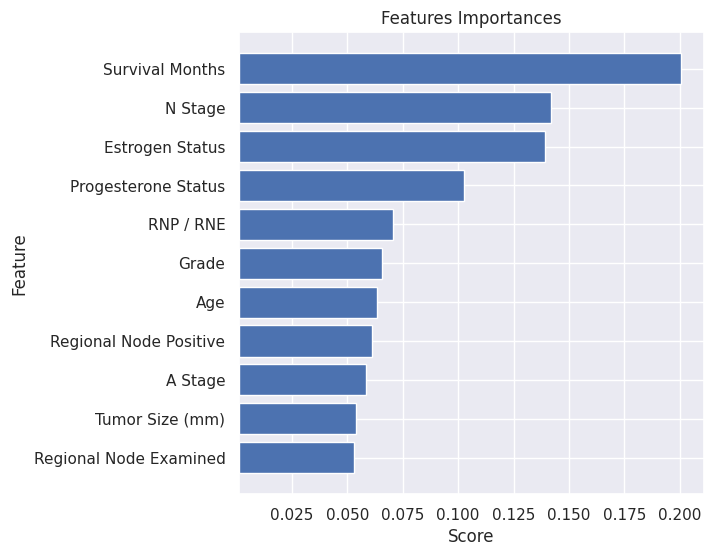

                   feature     score
0          Survival Months  0.199774
1                  N Stage  0.141095
2          Estrogen Status  0.138124
3      Progesterone Status  0.101886
4                RNP / RNE  0.069593
5                    Grade  0.064467
6                      Age  0.062410
7   Regional Node Positive  0.060286
8                  A Stage  0.057542
9          Tumor Size (mm)  0.052820
10  Regional Node Examined  0.052003


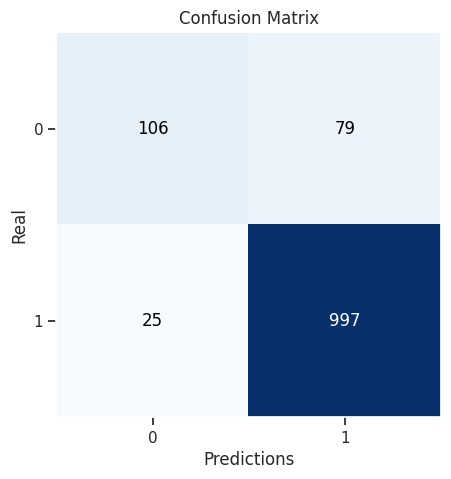

Precision: 0.9266
Sensibilidad: 0.9755
Especificidad: 0.5730


In [ ]:
modelo_2 = modelo(train2,X_full2)

##Conclusiones y Trabajos Futuros

*Gracias al Exploratory Data Analysis (EDA) y al Feature Engineering (FE) si se logró mejorar la exactitud del modelo que era uno de los objetivos del trabajo. (del 89,56% al 91,38%)

*Los conjuntos de datos estaban desequilibrados: Dentro del Dataset se encontraban ciertas columnas (sobretodo categóricas) que algunos valores únicos representaban más del 80% de toda la columna.

*Dentro del Dataset faltan características como M-Stage (Clasificiación de la Metástasis) o HER2 Status (Estado Receptor de la proteína HER2), que pueden ayudar a dar más información sobre el estado (Vivo/Muerto) de los pacientes, así como, valores únicos como T0, Tx, N0, Nx, A Stage (Local), por mencionar algunos.

*EL Dataset utilizado es una actualización del 2017 sobre pacientes entre 2006 y 2010, por ende, sería interesante actualizar el dataset para que este contuviera más pacientes así como más características.